<b>DOMAIN:</b> Smartphone, Electronics

<b>CONTEXT: </b> India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice.

<b>DATA DESCRIPTION:</b> 
<br>
• author : name of the person who gave the rating
<br>
• country : country the person who gave the rating belongs to
<br>
• date : date of the rating
<br>
• domain: website from which the rating was taken from
<br>
• extract: rating content
<br>
• language: language in which the rating was given
<br>
• product: name of the product/mobile phone for which the rating was given
<br>
• score: average rating for the phone
<br>
• score_max: highest rating given for the phone
<br>
• source: source from where the rating was taken

<b>PROJECT OBJECTIVE:</b> We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.

<b>Steps and tasks: </b>

##### 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [1]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from collections import defaultdict
from random import randrange

import surprise
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy as suracc
from surprise.model_selection import train_test_split
from surprise.model_selection.search import GridSearchCV 

#graphs
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

<i> Merge the provided CSVs into one data-frame. </i>

In [2]:
data_file_1 = pd.read_csv("Data Set/phone_user_review_file_1.csv",encoding = 'mbcs') # read input file with ANSI encoding
data_file_2 = pd.read_csv("Data Set/phone_user_review_file_2.csv",encoding = 'mbcs') # read input file
data_file_3 = pd.read_csv("Data Set/phone_user_review_file_3.csv",encoding = 'mbcs') # read input file
data_file_4 = pd.read_csv("Data Set/phone_user_review_file_4.csv",encoding = 'mbcs') # read input file
data_file_5 = pd.read_csv("Data Set/phone_user_review_file_5.csv",encoding = 'mbcs') # read input file
data_file_6 = pd.read_csv("Data Set/phone_user_review_file_6.csv",encoding = 'mbcs') # read input file

data_file_1.info(),data_file_2.info(),data_file_3.info(),data_file_4.info(),data_file_5.info(),data_file_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374910 entries, 0 to 374909
Data columns (total 11 columns):
phone_url    374910 non-null object
date         374910 non-null object
lang         374910 non-null object
country      374910 non-null object
source       374910 non-null object
domain       374910 non-null object
score        366691 non-null float64
score_max    366691 non-null float64
extract      371934 non-null object
author       371641 non-null object
product      374910 non-null object
dtypes: float64(2), object(9)
memory usage: 31.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114925 entries, 0 to 114924
Data columns (total 11 columns):
phone_url    114925 non-null object
date         114925 non-null object
lang         114925 non-null object
country      114925 non-null object
source       114925 non-null object
domain       114925 non-null object
score        112166 non-null float64
score_max    112166 non-null float64
extract      113965 non-null object
a

(None, None, None, None, None, None)

In [3]:
data_phone = pd.concat([data_file_1,data_file_2,data_file_3,data_file_4,data_file_5,data_file_6],axis=0)
data_phone.shape # check shape

(1415133, 11)

In [4]:
data_phone.info() # get meta data info 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
phone_url    1415133 non-null object
date         1415133 non-null object
lang         1415133 non-null object
country      1415133 non-null object
source       1415133 non-null object
domain       1415133 non-null object
score        1351644 non-null float64
score_max    1351644 non-null float64
extract      1395772 non-null object
author       1351931 non-null object
product      1415132 non-null object
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


##### There are null values in score, score_max, extract, author and product

<i> Check a few observations and shape of the data-frame. </i>

In [5]:
data_phone.sample(5) # check few observations

phone_url       date lang  \
24433                  /cellphones/htc-windows-phone-8/   4/3/2015   it   
58828                      /cellphones/apple-iphone-se/  4/30/2017   ru   
280714                               /cellphones/lg-g4/  7/13/2015   en   
169781  /cellphones/samsung-galaxy-j1-2016-4-5-sm-j120/  7/14/2016   en   
14273               /cellphones/samsung-galaxy-s7-edge/  3/18/2016   en   

       country          source       domain  score  score_max  \
24433       it            Ciao      ciao.it    8.0       10.0   
58828       ru  Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹  svyaznoy.ru    9.3       10.0   
280714      ca          Amazon    amazon.ca   10.0       10.0   
169781      us          Amazon   amazon.com   10.0       10.0   
14273       us         Samsung  samsung.com    8.8       10.0   

                                                  extract  \
24433   Ho comprato il mio HTC 8s due anni fa,utilizza...   
58828   Ð”Ð°Ð½Ð½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Ð·Ð°Ð¸Ð½Ñ‚ÐµÑ€ÐµÑ...   
280714  Excellent phone. Very fast processor and multi...   
169781                  Good phone, small and comfortable   
14273   The phone is great overall. The titanium color...   

                           author  \
24433                        xgf7   
58828   ÐÐ½Ñ‚Ð¾Ð½ Ð”ÐµÐ½Ð¸ÑÐ¾Ð²   
280714               FeelsGoodMan   
169781            Amazon Customer   
14273             Samsungforlive    

                                                  product  
24433                                HTC Windows Phone 8S  
58828       Apple iPhone SE 16GB (ÑÐµÑ€ÐµÐ±Ñ€Ð¸ÑÑ‚Ñ‹Ð¹)  
280714  LG G4 H812 32GB Factory Unlocked GSM Hexa-Core...  
169781  Samsung Galaxy Express 3 AT&T Prepaid (U.S. Wa...  
14273              Samsung Galaxy S7 edge 32GB (T-Mobile)

<i> Round off scores to the nearest integers. </i>

In [6]:
data_phone['score'].unique() # check unique values before rounding off

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [7]:
data_phone['score_max'].unique()

array([10., nan])

In [8]:
p_data = data_phone.copy() # take a copy before imputing

In [9]:
p_data['score'] = p_data['score'].round() # round off to nearest integer

In [10]:
p_data['score'].unique() # check unique values after rounding off

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

<i> Check for missing values. Impute the missing values if there is any. </i>

In [11]:
p_data[p_data['product'].isnull()] # check for the only missing value for product.

phone_url       date lang country  source  \
312960  /cellphones/samsung-galaxy-s-iii/  1/22/2014   de      de  Amazon   

           domain  score  score_max  \
312960  amazon.de   10.0       10.0   

                                                  extract author product  
312960  Bestes Smartphone was ich bisher hatte :) Ã¶af...    NaN     NaN

In [12]:
for product in p_data['product'].unique():
    print("Product:", product) # check for unique values of product   

Product: Samsung Galaxy S8
Product: Samsung Galaxy S8 (64GB) G950U 5.8" 4G LTE Unlocked (GSM + CDMA, US WARRANTY) (Orchid Gray)
Product: Samsung Galaxy S8 64GB (AT&T)
Product: Samsung Galaxy S8, 64Gb - Black
Product: Samsung Galaxy S8, 64Gb - Orchid Grey
Product: Samsung Galaxy S8 (64GB, Midnight Black)
Product: Samsung Galaxy S8, 5.8" 64GB (Verizon Wireless) - Orchid Gray
Product: Samsung Galaxy S8 review: the best phone ever
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Samsung Galaxy S8 64GB
Product: Samsung Galaxy S8 â€Android-puhelin 64 Gt, Midnight Black
Product: Samsung Galaxy S8 â€Android-puhelin 64 Gt, Arctic Silver
Product: Samsung Galaxy S8 64GB Sort
Product: Samsung Galaxy S8 Zwart
Product: Samsung Galaxy S8 smarttelefon (grÃ¥)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy S8 64Gb
Product: Samsung Galaxy S8 Smartphone, 64 GB, Nero
Product: Samsung Galaxy S8, 64GB, ÄernÃ¡
Product: Samsung Galaxy S8 grijs / 64 GB
Product: Samsung Galaxy S8 zilver / 64 GB
Product: Samsung Galaxy S8 smartphon

Product: Apple iPhone 6s Plus 16GB 4G Oro, Rosa - Smartphone (SIM Ãºnica, iOS, NanoSIM, EDGE, GSM, CDMA, DC-HSDPA, HSPA+, TD-SCDMA, UMTS, LTE)
Product: Apple iPhone 6s Plus 128 GB spacegrau MKUD2ZD/A
Product: Apple iPhone 6s Plus 64GB 4G Plata - Smartphone (SIM Ãºnica, iOS, NanoSIM, EDGE, GSM, CDMA, DC-HSDPA, HSPA+, TD-SCDMA, UMTS, LTE)
Product: Apple iPhone 6s Plus Smartphone dÃ©bloquÃ© 4G (Ecran : 5,5 pouces - 128 Go - iOS 9) Gris SidÃ©ral
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ APPLE iPhone 6S Plus (64Gb, 3D Touch)
Product: Apple iPhone 6s Plus 128GB 4G Gris - Smartphone (SIM Ãºnica, iOS, NanoSIM, EDGE, GSM, DC-HSDPA, HSPA+, TD-SCDMA, UMTS, LTE)
Product: Apple Iphone 6s plus 64 gb oro libre
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ APPLE iPhone 6S Plus (5.5", Ð9,128Gb, GPS, 2ÐºÐ°Ð¼ÐµÑ€Ñ‹, ÐºÐ¾Ñ€Ð¿ÑƒÑ - Ð°Ð»ÑŽÐ¼Ð¸Ð½Ð¸Ð¹-Ñ†Ð¸Ð½Ðº)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Apple iPhone 6s Plus 64GB (MKU92RU/A)
Product: Apple iPhone 6s Plus Smartphone dÃ©bloquÃ© 4G (Ecran : 5,5 pouces - 64 Go - iOS 9) Or
Product: Apple iPhone 6s 

Product: APPLE IPHONE 6S 32GB SPACE GREY
Product: iPhone 6s 128 GB - sort
Product: iPhone 6s 32 GB (guld)
Product: Apple IPHONE 6S 32GB SILVER
Product: Apple iPhone 6s 32 GB RosÃ©gold MN122ZD/A
Product: Apple iPhone 6s 64GB
Product: iPhone 6s 16 GB - rymdgrÃ¥
Product: Apple iPhone 6s 128 GB
Product: Apple iPhone 6s 128GB
Product: Smartphone Apple iPhone 6S 32GB
Product: iPhone 6s 32 GB (rosa guld)
Product: APPLE Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ APPLE iPhone 6s MKQT2RU/A 128Gb, ÑÐµÑ€Ñ‹Ð¹
Product: Apple iPhone 6S 32GB Black
Product: iPhone 6s Apple com 64GB e Tela 4,7â€ HD com 3D Touch, iOS 9, Sensor Touch ID, CÃ¢mera iSight 12MP, Wi-Fi, 4G, GPS, Bluetooth e NFC - Ouro Rosa
Product: iPhone 6s Apple com 16GB e Tela 4,7â€ HD com 3D Touch, iOS 9, Sensor Touch ID, CÃ¢mera iSight 12MP, Wi-Fi, 4G, GPS, Bluetooth e NFC - Ouro Rosa
Product: Apple Apple iPhone 6s, 128 Go, 4.7'' Or Rose
Product: Apple Apple iPhone 6s, 32 Go, 4.7'' Gris SidÃ©ral
Product: Apple Apple iPhone 6s, 32 Go, 4.7'' Or Rose
Product: Appl

Product: Apple iPhone 7 (4.70", 32GB, 12MP, Silver)
Product: Apple iPhone 7 (4.70", 128GB, 12MP, Rose Gold)
Product: Apple iPhone 7 (4.70", 256GB, 12MP, Black)
Product: Huawei Mate 9 Pro 128GB LON-L29 Dual-Sim Gold (Factory Unlocked Intl. Model) GSM ONLY
Product: Huawei Mate 9 Pro LON-L29C 6GB / 128GB 5.5-inch 4G LTE Dual SIM FACTORY UNLOCKED - International Stock No Warranty (GREY)
Product: Huawei Mate 9 Pro Dual SIM (Haze Gold, 128GB, 6GB RAM) - International Version
Product: Huawei.. 5.5" HUAWEI Mate 9 Pro 6GB/128GB LON-L29 Dual SIM Leica Dual Camera Factory Unlocked Cell Phone(Haze Gold) - 1 Year Warranty
Product: Huawei Mate 9 Pro 4GB Ram 64GB Storage Gold - Dual SIM, 4G LTE, Multi-Language, Google Play Store, No Warranty
Product: Huawei Mate 9 Pro Dual-SIM â€Android-puhelin, 128 Gt, harmaa
Product: Huawei Mate 9 Pro Dual-SIM â€Android-puhelin, 128 Gt, kulta
Product: Huawei Mate 9 Pro
Product: Huawei Mate 9 Pro (Dual SIM) Grey
Product: Huawei Mate 9 Pro 128GB GrÃ¥
Product: Huawe

Product: Samsung Galaxy S6 Edge (Black Sapphire, 32GB)
Product: Samsung Galaxy S6 Edge SM-G925F 32GB Gold (FACTORY UNLOCKED)
Product: Samsung Galaxy S6 Edge, Black Sapphire 128GB (AT&T)
Product: Samsung Galaxy S6 Edge SM-G925 32GB Sapphire Black Unlocked
Product: Samsung Galaxy S6 Edge SM-G925F Factory Unlocked Cellphone, International Version, 32GB (Green)
Product: Samsung Galaxy S6 Edge, White Pearl 64GB (AT&T)
Product: Samsung Galaxy S6 Edge, Gold Platinum 128GB (AT&T)
Product: Samsung Galaxy S6 Edge, White Pearl 128GB (Verizon Wireless)
Product: Samsung Galaxy S6 Edge G925i 32GB Unlocked GSM LTE Octa-Core Phone w/ 16MP Camera - Gold Platinum (International Version)
Product: Samsung Galaxy S6 Edge Smartphone, Android, 5.1", 4G LTE, SIM Free, 32GB, Black
Product: Samsung Galaxy S6 Edge 32GB SIM-Free Smartphone - Black (SM-G925F)
Product: Samsung Galaxy S6 Edge 64 GB UK SIM-Free Android Smartphone - White
Product: Samsung S6 Edge UK Version SIM Free 128GB - Black
Product: Samsung Gala

Product: Samsung Galaxy J5 2016 Smartphone, 16 GB, Bianco
Product: Samsung Galaxy J5 (2016) â€Android-puhelin, musta
Product: Samsung Galaxy J5 DUOS Smartphone (13,2 cm (5,2 Zoll) Touch-Display, 16 GB Speicher, Android 6.0) schwarz
Product: SAMSUNG GALAXY J5 2016 GOLD
Product: Smartphone Samsung Galaxy J5 SM-J510M
Product: Samsung Galaxy J5 (2016) â€Android-puhelin, kulta
Product: Samsung Galaxy J5 (2016) â€Android-puhelin, valkoinen
Product: Samsung Galaxy J5 (2016) SAMSUNG Galaxy J5 (2016) Svart
Product: Samsung J510 Galaxy J Smartphone da 16GB, Marchio Tim, Oro [Italia]
Product: Samsung J510 Galaxy J Smartphone da 16GB, Marchio Tim, Nero [Italia]
Product: SAMSUNG - Smartphone Galaxy J5 2016 noir
Product: Samsung SM-J510FZDNXEO Galaxy Smartphone J5 (16GB Speicher, Super Amoled LTE WiFi Bluetooth NFC, 13,20 cm (5,2 Zoll)) gold
Product: Samsung Galaxy J5 (2016) zwart / 16 GB
Product: Samsung Galaxy J5 (2016) goud / 16 GB
Product: Samsung Galaxy J5 DUOS Smartphone (13,2 cm (5,2 Zoll)

Product: Huawei P8 Mystic Champagne LTE-Smartphone 13.2 cm (5.2 Zoll) 2.0 GHz Octa Core 16 GB 13 Mio. Pixel Android 5.0 Lollipop Champagner, WeiÃŸ
Product: Huawei P8 4G - Smartphone Vodafone (13,21 cm (5.2"), 1920 x 1080 Pixeles, IPS, 2 GHz, Hi-Silicon, Kirin 930), color gris titanio
Product: HUAWEI Ascend P8 16GB 4G Grigio - Android 5.2 - LTE
Product: HUAWEI SMARTPHONE P8 5.2" FHD OCTA CORE 3GB RAM PLATA
Product: Huawei Ascend P8 Smartphone, 16 GB, Marchio TIM, Titanium Grey
Product: Huawei Ascend P8 Mobiltelefon
Product: Huawei 'Huawei P8 16 GB 4 G Champagne â€“ Smartphone (13,208 cm (5.200), 1920 x 1080 Pixel, IPS, 2 GHz, Hi, Kirin 930)
Product: Huawei - 51094235 - P8 NFC LTE - Smartphone Compact
Product: HUAWEI P8 Titanium Grey
Product: HUAWEI P8 Mystic Champagne
Product: HUAWEI P8
Product: Huawei - P8 - Smartphone DÃ©bloquÃ© - 4G (Ecran : 5,2 pouces - 16 Go - Simple SIM - Android 5.0 Lollipop) - Mystic Champagne
Product: Smartphone Huawei - P8 Mystic Champagne
Product: Smartphone 

Product: Asus ZenFone 3 ZE552KL 64GB Sapphire Black, Dual Sim, 4GB, 5.5-inch, Unlocked International Model, No Warranty
Product: Asus ZenFone 3 ZE520KL 4GB / 64GB 5.2-inch 4G LTE Dual SIM Factory Unlocked - International Stock No Warranty (SAPPHIRE BLACK)
Product: TUDIA ZenFone 3 ZE552KL Case, TUDIA Ultra Slim Full-Matte Lightweight [ARCH] TPU Bumper Shock Absorption Case for ASUS ZenFone 3 ZE552KL (5.5 inch) (Frosted Clear)
Product: Asus Zenfone 3 ZE520KL-1B036IN (White)
Product: Foso Silicon Transparent Flexible with Protective Shock Proof Corner For Asus Zenfone 3 ( 5.2" inch ZE520KL )
Product: Asus ZenFone 3 ZE520KL Unlocked Dual Sim Phone, 32GB, 5.2-inch, 3GB RAM, No Warranty - International Version (Moonlight White)
Product: Asus ZenFone 3 ZE552KL 4GB / 64GB 5.5-inch 4G LTE Dual SIM FACTORY UNLOCKED - International Stock No Warranty (SHIMMER GOLD)
Product: Asus ZenFone 3 ZE552KL 64GB Moonlight White, Dual Sim, 4GB, 5.5-inch, Unlocked International Model, No Warranty
Product: Asus

Product: Mi Xiaomi Mi Max Prime (Gold, 128GB)
Product: Xiaomi Mi Max Prime
Product: Mi Xiaomi Mi Max (Silver, 32GB)
Product: Mi Xiaomi Mi Max (Gold, 32GB)
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Xiaomi Mi Max 32GB
Product: Xiaomi Mi Max 32Gb (ÑÐµÑ€ÐµÐ±Ñ€Ð¸ÑÑ‚Ñ‹Ð¹)
Product: Xiaomi Mi Max dÃ©bloquÃ© 6,44 pouces 4G Smartphone A
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Xiaomi Mi Max 32Gb Silver
Product: Xiaomi ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Xiaomi Mi Max
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Xiaomi Mi Max 64GB
Product: Xiaomi Mi Max Silver
Product: Xiaomi Mi Max - 32GB, LTE, stÅ™Ã­brnÃ¡
Product: Xiaomi Mi Max 128GB
Product: Xiaomi Mi Max Gold
Product: Xiaomi Mi Max 32GB
Product: Xiaomi Mi Max 64Gb
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Xiaomi Mi Max
Product: Xiaomi Mi Max 32Gb
Product: Xiaomi Mi Max 3GB/32GB Qualcomm Snapdragon 650 - 3GB RAM - 32GB ROM - Pantalla FullHD 6.44" - CÃ¡mara de 16MP - 4G - Dual SIM - PLATA/DORADO/GRIS- LaMovileria (cargador de certificaciÃ³n CE)
Product: Xiaomi Mi Max 3GB 32GB 6.44''

Product: Huawei Ascend Mate 7 Gold
Product: Huawei Ascend Mate 7 zilver / 16 GB
Product: Huawei Mate 7 - Smartphone libre Android (pantalla 6", cÃ¡mara 13 Mp, 16 GB, Quad-Core 1.8 GHz, 2 GB RAM), blanco
Product: HUAWEI Ascend Mate 7 - 4G - argent - Smartphone
Product: Huawei Ascend Mate 7 Premium
Product: HUAWEI Ascend Mate 7 dualsim gold SIMfree
Product: HUAWEI Ascend Mate 7 - 4G - argento - Smartphone
Product: Huawei Ascend Mate 7 Smartphone DÃ©bloquÃ© 4G Or
Product: Huawei Ascend Mate 7 16 GB Zilver
Product: HUAWEI Mate 7 noir + 1 carte mÃ©moire Micro SD Kingston SDC4 16 Go + Adaptateur SD fourn...
Product: HUAWEI Mate 7 argent
Product: Huawei Touchscreen-Handy Ascend Mate 7
Product: Huawei Smartphone Huawei Mate 7 32 Go Gold
Product: HUAWEI Ascend Mate 7 - 4G - noir - Smartphone
Product: HUAWEI Mate 7 Gold Dual SIM ( hybridnÃ­ )
Product: HUAWEI Mate 7 Black
Product: HUAWEI Mate 7 White Silver
Product: Huawei Mate 7 - Smartphone libre Android (pantalla 6", cÃ¡mara 13 Mp, 16 GB, Quad

Product: DTEK60 by BlackBerry
Product: BlackBerry DTEK60 BBA100-1 32GB Smartphone (Unlocked, Earth Silver)
Product: BlackBerry DTEK 60 (32GB, 4GB RAM ) 4G LTE / VoLTE
Product: BlackBerry DTEK60 Swivel Holster Case - Black
Product: BlackBerry DTEK60 Smart Pocket Case - Black
Product: BlackBerry DTEK60 (32GB, 4GB RAM, Earth Silver) - International Variant
Product: BlackBerry ACC63072001 Case for DTEK60-Black
Product: BlackBerry ACC63072001 Smart Flip DTEK60 Black
Product: BlackBerry PRD-63036-001 DTEK60 Unlocked Phone, Black
Product: Popsky Blackberry DTEK60 Screen Protector [Tempered Glass][Scratch-Resistant][Ultra Clear],Popsky High Definition Bubble-free Scratch Proof Premium Screen Protector Glass Blackberry DTEK60
Product: BlackBerry DTEK60 Factory Unlocked Phone - Earth Silver
Product: BlackBerry DTEK 60 Factory Unlocked GSM 32GB Earth Silver (International version/ No warranty BBA100-2( LTE bands 1, 2, 3, 4, 5, 7, 8, 19, 20, 28A TD LTE 38 40 41))
Product: BlackBerry DTEK60 UK SIM-

Product: SAMSUNG Galaxy A7 2016 - Gold
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Samsung Galaxy A7 SM-A710F
Product: Samsung Galaxy A7 SM-A710M
Product: Smartphone Samsung Galaxy A7 2016 Duos A710 Desbloqueado Rosa
Product: Smartphone Samsung Galaxy A7 2016 Duos A710 Desbloqueado Dourado
Product: Samsung Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy A7 (2016) SM-A710F Gold
Product: Samsung Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy A7 (2016) SM-A710F Black
Product: Samsung Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy A7 (2016) SM-A710F White
Product: ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung A710F Galaxy A7 2016 Duos Pink Gold (SM-A710FEDDSEK)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy A7 (2016) SM-A710F (Super AMOLED, 1080Ñ…1920, Gorilla Glass 4, 8 ÑÐ´ÐµÑ€ Ð¿Ñ€Ð¾Ñ†-Ñ€)
Product: Samsung SM-A710 Galaxy A7 (2016) black
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Samsung Galaxy A7 SM-A700FD Black
Product: ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung A710F Galaxy A7 2016 Duos Champagne Gold (SM-A710FZDDSEK)
Product: ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung

Product: Meizu MX5 5.5" con procesador Helico X10 MTK6795T 64Bit Octa Core 2.2GHz. Memoria de 3GB RAM y 32GB ROM. CÃ¡mara frontal de 5MP y trasera de 20.7 MP. Android 5.0. NEGRO/PLATA
Product: Meizu MX5 - Smartphone libre Android (pantalla 5.5", cÃ¡mara 20.7 Mp, 32 GB, Octa-Core 2.2 GHz, 3 GB RAM), plateado (importado)
Product: PRO 5 MEIZU PRO 5 de 5.7" pulgadas, procesador Exynos 7420 Octa Core. 3GB de RAM y 32GB de memoria ROM. CÃ¡mara frontal de 5MP y trasera de 21.16MP. Flyme 5.0. GRIS
Product: Meizu MX5 5.5 "avec Helio X10 MTK6795 Turbo de 64 bits Ã  2,2 GHz de processeur Octa-Core. 3GB RAM et 16 Go ROM. 5MP appareil photo avant et 20,7 MP camÃ©ra arriÃ¨re. Android 5.0. NOIR
Product: Meizu MX5 - Smartphone de 5.5" (Helico X10 MTK6795T 64bit Octa Core 2.2 GHz, 3 GB de RAM, 16 GB de ROM, cÃ¡mara frontal de 5 Mp y trasera de 20.7 Mp, Android 5.0) negro y plateado
Product: Meizu MX5 - Smartphone de 5.5" (4G, Octa Core de 2.2 GHz, 3 GB de RAM, 16 GB, cÃ¡mara de 20.7 MP, Android 5.1) co

Product: OUKITEL K10000 Smartphone 5.5 " Ecran HD IPS 4G Android 5.1 MT6735P Quad Core Dual SIM 2G RAM + 16G ROM 10000mAh Gesture DÃ©bloquÃ© Geste Mouvement Mobile Phone Portable
Product: Oukitel K10000 4G Smartphone MTK6735P Quad Core 1.0GHz 5.5 Pulgada 1280 x 720 pixeles HD Pantalla 2GB+16GB 10000mAh Power Bank Function 8.0MP CÃ¡mara Doble Micro-SIM Tarjeta Smartphone libre desbloqueado
Product: OUKITEL K10000 - Smartphone 4G Libre Android 5.1 (Quad Core, Pantalla 5.5", IPS 1280*720 HD, 2GB RAM, 16GB ROM, CÃ¡mara 8.0MP, Dual SIM, Smart Gesto, GPS, OTG) Negro
Product: OukiTel K10000 4G Smartphone (Android 5.1 Lollipop, Super Gran Capacidad 10000mAh, 5.5" MT6735 720p, 2GB RAM, 16GB ROM, CÃ¡mara de 13MP Cuerpo de AleaciÃ³n de Aluminio)
Product: OUKITEL K10000 4G Smartphone (Android 5.1 Lollipop, Super Gran Capacidad 10000mAh, 5.5" MT6735 720p, 2GB RAM, 16GB ROM, CÃ¡mara de 13MP Cuerpo de AleaciÃ³n de Aluminio)
Product: Lenovo Z2 Plus
Product: Xiaomi Mi Note Pro
Product: Xiaomi Mi Note P

Product: WileyFox Swift Smartphone 4G LTE, Dual SIM, Schermo HD 5 pollici, RAM 2 GB, Memoria Interna 16 GB, Fotocamera da 13 MP, Processore Qualcomm Snapdragon 1.2 GHz, Cyanogen 13, Nero
Product: Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zoll (12,70 cm) Display, 16 GB Speicher, Cyanogen OS 12.1) Sandstein-Schwarz + Gutschein fÃ¼r Reparaturservice bei Displayschadenwith + HÃ¼lle
Product: Wileyfox Swift 4G Dual-SIM Smartphone (5,0 Zoll (12,70 cm) Display, 16 GB Speicher, Cyanogen OS 12.1) Sandstein-Schwarz
Product: WileyFox Swift Smartphone 4G LTE, RAM 2 GB, 16 GB, Fotocamera da 13 MP, Processore Qualcomm Snapdragon, Nero + Custodia + Voucher Riparazione Schermo 12 Mesi
Product: WileyFox Swift - Smartphone libre Android (pantalla 5", cÃ¡mara 13 Mp, 16 GB, 2 GB RAM, Dual SIM), negro
Product: Wileyfox Swift Smartphone DÃ©bloquÃ© 4G (Ecran : 5 Pouces - 16 Go - Double SIM - Android 6.0 CyanogenOS) Noir
Product: Wileyfox Swift Smartphone DÃ©bloquÃ© 4G (Ecran : 5 Pouces - 16 Go - Double SIM -

Product: Samsung Galaxy Alpha, Dazzling White 32GB (AT&T)
Product: Samsung Galaxy Alpha G850F 32GB Unlocked GSM Quad-Core Octa-Core 4G LTE Smartphone, Black
Product: Samsung G850F Galaxy Alpha UK 4G SIM-Free Smartphone - Dazzling White
Product: Samsung Galaxy Alpha SM-G850Y (Frosted Gold)
Product: Samsung SM-G850F Galaxy Alpha NFC LTE Compact Smartphone
Product: Samsung Galaxy Alpha Smartphone (4,7 Zoll (11,9 cm) Touch-Display, 32 GB Speicher, Android 4.4) blau
Product: Samsung Galaxy Alpha Smartphone, Display 4,7 Pollici Super-AMOLED, Processore Octa-Core, Fotocamera 12 MP, Android 4.4, Blu [Germania]
Product: Samsung G850F Galaxy Alpha Smartphone, Nero [Europa]
Product: Smartphone Samsung Galaxy Alpha 32GB G850M
Product: Samsung ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung Galaxy Alpha
Product: Samsung Galaxy Alpha SM-G850F 32Gb
Product: Samsung G850 Galaxy Alpha Smartphone, 32 GB, Nero [Italia]
Product: Samsung Galaxy Alpha SM-G850F
Product: Samsung Galaxy Alpha Movistar Smartphone Lib

Product: Microsoft Lumia 532 Dual-SIM Wit
Product: Microsoft ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Microsoft Lumia 532 Dual SIM
Product: Microsoft Lumia 532, Lumia 532 Dual SIM Stylish PlÃ¥nbok VÃ¤ska - Vintage American Flag
Product: Microsoft Lumia 532 - Smartphone libre Windows Phone (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, dual SIM), blanco (importado)
Product: Microsoft Lumia 532 - Smartphone libre Windows Phone (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, dual SIM), negro (importado)
Product: Nokia Microsoft Lumia 532 Smartphone dÃ©bloquÃ© 3G+ (Ecran : 4 pouces - 8 Go - Double SIM - Windows Phone 8.1) Blanc
Product: Microsoft Lumia 532 - Smartphone libre Windows Phone (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Qualcomm Snapdragon 1.2 GHz, 1 GB RAM, dual SIM), naranja (importado)
Product: Microsoft Lumia 532 Smartphone Dual-SIM (10,16 cm (4 Zoll) Display, 5 Megapixel Kamera, Qualcomm Snapdragon Prozessor, 1,2GHz, micro-USB 2.0, Bluetooth 4.0, 1GB RAM, Win

Product: Nokia Lumia 930 Smartphone, 32 GB, Verde [Italia]
Product: Nokia Lumia 930 Windows Phone â€puhelin, valkoinen
Product: Nokia Lumia 930 Smartphone, Display 5 pollici, Fotocamera 20 MP, 2GB RAM, Processore Quad-Core 2,2GHz, Memoria 32GB, Windows Phone 8.1, Nero [Germania]
Product: Microsoft Nokia Lumia 930 Smartphone (12,7 cm (5 Zoll) Touchscreen, 20 Megapixel Kamera, 2GB RAM, Quad-Core-Prozessor, 2,2GHz, 32GB interner Speicher, Windows Phone 8.1) schwarz [T-Mobile-Branding]
Product: Smartphone Nokia Lumia 32GB 930 4G
Product: Nokia Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Nokia Lumia 930 Black
Product: Nokia Lumia 930 Smartphone USB/Wi-Fi Windows Phone 8 32 GB
Product: Nokia Lumia 930 Smartphone, 32 GB, Marchio TIM, Nero [Italia]
Product: Nokia Lumia 930, Handy
Product: Nokia Mobiltelefoner Lumia 930
Product: Nokia Lumia 930 Etui avec Couvercle - Vert
Product: Nokia Lumia 930 Smartphone, Display 5 pollici, Fotocamera 20 MP, 2GB RAM, Processore Quad-Core 2,2GHz, Memoria 32GB, Windows Phone 8.1, Bianco

Product: HTC Desire 530 16GB
Product: HTC 99HAHW046-00 Desire 530 Smartphone (4G) Solid Stratus weiÃŸ
Product: HTC Desire 530 Remix Smartphone dÃ©bloquÃ© 4G (Ecran : 5 pouces - 16 Go - Simple Nano-SIM - Android) Gris
Product: Ð‘ÑŽÐ´Ð¶ÐµÑ‚Ð½Ñ‹Ð¹ ÑÐ¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ HTC Desire 530 (5.0 IPS, 4-ÑÐ´ÐµÑ€Ð½. Ð¿Ñ€Ð¾Ñ†., 1,5REM+16+256GB, 2 ÐºÐ°Ð¼ÐµÑ€Ñ‹, GPS, LTE)
Product: HTC Desire 530 anthracite - or 16Go
Product: HTC 99HAHW033-00 Desire 530 Smartphone (4G) Gris foncÃ©
Product: HTC Desire 530 Smartphone dÃ©bloquÃ© 4G (Ecran : 5 pouces - 16 Go - Simple Nano-SIM - Android) Blanc
Product: HTC Desire 530 Grijs
Product: Lenovo Vibe K5 Note (32 GB)(With 4 GB RAM) 5.5 inch Full HD Display Unlocked Phone
Product: Lenovo Vibe K5 Note
Product: Lenovo Vibe K5 Note (3GB RAM)
Product: LENOVO K5 NOTE 32 GB AKILLI TELEFON GOLD
Product: Lenovo K5 Note 3+32GB 4G LTE Dual Sim Android 5.1 Octa Core 1.8GHz 5.5 inch FHD 8+13MP Plata
Product: Lenovo K5 Note
Product: Lenovo ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Lenovo K5

Product: ONEPLUS X 4G Smartphone Snapdragon 801 Quad Core 2.3GHz 5.0 Pulgada 1920 x 1080 pixels FHD Pantalla 3GB+16GB Dual Glass AMOLED 13.0MP CÃ¡mara Doble Nano-SIM Tarjeta Smartphone libre desbloqueado Blanco
Product: Samsung Galaxy E5
Product: Samsung Galaxy E5 E500 SM-E500H/DS 16GB Dual Sim Gsm Mobile Phone Unlocked (Black)
Product: Samsung Galaxy E5 (Brown)
Product: Samsung Galaxy E5 (Black, 16GB)
Product: Samsung Galaxy E5 (White,16GB)
Product: Samsung Galaxy E5 E500H 16GB Dual Sim Brown
Product: Samsung Galaxy E5 E500H 16GB Dual Sim Black
Product: Samsung Galaxy E5 DUAL SIM Simfree 16GB 5 Inch Super Amoled Tochscreen Smartphone - White
Product: Smartphone Samsung Galaxy E5 16GB E500
Product: Samsung Galaxy E5 SM-E500H/DS
Product: Smartphone Samsung Galaxy E5 E500M Duos Desbloqueado Preto
Product: Smartphone Samsung Galaxy E5 E500M Duos Desbloqueado Branco
Product: Samsung Galaxy E5 SM-E500F/DS
Product: Samsung ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung Galaxy E5 E500H DUOS
Produc

Product: Sony Xperia Z3 - Smartphone (13,21 cm (5.2"), 1920 x 1080 Pixeles, TFT, 2,5 GHz, Qualcomm Snapdragon, 3072 MB) Color blanco (importado)
Product: Sony D6603 XPERIA Z3 Svart Fraktfritt
Product: Sony Smartphone Sony Xperia Z3 Compact 4G Android 4.4 - CÃ¢m. 20.7MP Tela 4.6" Proc. Quad Core Wi-Fi A-GPS
Product: SONY Xperia Z3 - bianco - 16 GB - 4G - Smartphone
Product: Sony Mobile Xperia Z3 Smartphone DÃ©bloquÃ© 4G (Ecran : 5.2 pouces - 16 Go - IP 65 / IP68, Waterproof - Android 4.4 KitKat) Noir,
Product: Sony Xperia Z3 D6603 Mobiltelefon
Product: Sony Xperia Z3 Dual D6633 (Black)
Product: Sony Xperia Z3 Dual D6633 (Copper)
Product: Sony Xperia Z3 TV Digital D6643 Desbloqueado - Preto
Product: Sony D6603 Xperia Z3 Vit Fraktfritt
Product: Sony D6603 Xperia Z3 Koppar Fraktfritt
Product: Sony Mobile Xperia Z3 Smartphone DÃ©bloquÃ© 4G (Ecran : 5.2 pouces - 16 Go - IP 65 / IP68 Waterproof- Android 4.4 KitKat) Blanc
Product: Sony Xperia Z3, Handy
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ SONY Xperia Z3 

Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Meizu M3s
Product: Meizu M3s 16 Go Gris
Product: Meizu M3s 32 Go Gris
Product: Meizu M3s 16 Go Argent
Product: Meizu Smartphone Meizu M3S 32 Go Double SIM Gris
Product: Meizu Smartphone Meizu M3S 16 Go Double SIM Or
Product: Meizu Smartphone Meizu M3S 16 Go Double SIM Gris
Product: Meizu M3s 16GB
Product: Meizu M3S - Smartphone libre Android (4G, pantalla 5", 32 GB, 3 GB RAM, cÃ¡mara 13 Mp), color plateado
Product: Meizu M3S
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Meizu M3s 32GB
Product: Meizu M3S - Smartphone libre Android (5", 16 GB, 2 GB de RAM, 13 MP), color gris
Product: Meizu M3S - Smartphone libre Android (4G, pantalla 5", 32 GB, 3 GB RAM, cÃ¡mara 13 Mp), color dorado
Product: Meizu M3S Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 16 Go - Double-SIM Android) Gris E.U. version
Product: Meizu M3S - Smartphone libre Android (4G, pantalla 5", 16 GB, 2 GB RAM, cÃ¡mara 13 Mp), color dorado
Product: Meizu M3S - Smartphone libre Android (4G, pantalla 5", 16 GB, 2 GB RA

Product: Nokia 215 (Dual SIM, White)
Product: Nokia 215 (Dual SIM, Black)
Product: Nokia 215 (Dual SIM, Green)
Product: FCS Rubberised Silicon Back Case For Nokia 215 Dual Sim In Matte Finish-Black
Product: Nokia / Microsoft 215 Dual SIM Unlocked Sim Free Cheap Mobile Phone
Product: Microsoft Nokia 215 UK-Sim Free Mobile Phone - Black
Product: Nokia 215 Telefono Cellulare, Dual SIM, Verde [Italia]
Product: Nokia A00023207 215 Smartphone Dual-SIM (5,08 cm (2,4 Zoll) Display, 0,3 Megapixel Kamera, GSM-Dualband, 8MB RAM...
Product: Olympus FL-900R â€salamalaite
Product: Nokia (438) 215
Product: Microsoft Nokia A00023208 215 Smartphone Dual-SIM (5,08 cm (2,4 Zoll) Display, 0,3 Megapixel Kamera, GSM-Dualband, 8MB RAM, Bluetooth 3.0, micro-USB 2.0) weiss
Product: Nokia 215 Dual Sim
Product: Nokia 215 Smartphone Dual SIM, Nero [Italia]
Product: Nokia 215 Dual-SIM-Handy, MicroSD, 0.3 MP Kamera, 21 Tage StandBy, Schwarz
Product: Nokia 215 Mobiltelefon (svart)
Product: Nokia A00023209 215 Smart

Product: BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - Grey
Product: BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - Orange
Product: BLU WIN JR - 4.0" Windows Smartphone - US GSM Unlocked - White
Product: BLU Win JR Smartphone - Unlocked - Pink
Product: BLU Win Jr LTE - GSM Unlocked Windows Smartphone - Pink
Product: Blu Win JR LTE (White)
Product: Blu Win JR LTE (Yellow)
Product: BLU Win Jr LTE - GSM Unlocked Windows Smartphone - Orange
Product: BLU Win JR 4-Inch Windows Phone 8.1, 5MP Camera, Unlocked Cell Phones-White
Product: BLU Win JR Smartphone-Unlocked-Yellow
Product: BLU Win JR Smartphone-Unlocked-White
Product: BLU Win JR Smartphone-Unlocked-Orange
Product: BLU Win JR 4-Inch Windows Phone 8.1, 5MP Camera, Unlocked Cell Phones-Yellow
Product: BLU Win JR 4-Inch Windows Phone 8.1, 5MP Camera, Unlocked Cell Phones-Pink
Product: BLU WIN JR - 4.0" Windows Smartphone - Global GSM Unlocked - Orange
Product: BLU Win Jr LTE - GSM Unlocked Windows Smartphone - Gray
P

Product: Samsung GOOGLE NEXUS S UNLOCKED CELL PHONE
Product: Lenovo Motorola Nexus 6 Smartphone, 32 GB, Blu [Italia]
Product: Lenovo Motorola Nexus 6 Smartphone (6 Zoll (15,2 cm) Touch-Display, 64 GB Speicher, Android 5.0 Lollipop) weiÃŸ
Product: Lenovo Motorola Nexus 6 Smartphone (6 Zoll (15,2 cm) Touch-Display, 32 GB Speicher, Android 5.0 Lollipop) weiÃŸ
Product: Motorola Google Nexus 6
Product: Lenovo Motorola Nexus 6 Smartphone, Display 6 Pollici Quad-HD, Processore 2,7 GHz Quad-Core Snapdragon 805, Memoria 32GB, Android 5.0 Lollipop, Blu [Francia]
Product: Google Nexus 6 32GB
Product: Lenovo Motorola Nexus 6 Smartphone (6 Zoll (15,2 cm) Touch-Display, 32 GB Speicher, Android 5.0 Lollipop) blau
Product: Motorola Nexus 6 32Gb
Product: Motorola Nexus 6 64 GB
Product: Lenovo Motorola Nexus 6 Smartphone, 64 GB, Blu [Italia]
Product: Motorola Nexus 6 64Gb
Product: Motorola Nexus 6 64GB
Product: Google Motorola Google Nexus 6
Product: Google Nexus 6 - Smartphone libre Android (pantalla 5

Product: Samsung Galaxy J1 Mini prime 8GB J106B/DS Dual Sim Unlocked Phone - Retail Packaging (Gold) - International Version
Product: Samsung BRAND NEW SAMSUN GALAXY J1 MINI PRIME SM-J106H/DS BLACK 8GB DUAL SIM UNLOCK 2016 MODEL (WHITE)
Product: Elephone 5.0" Elephone P6000 MTK6732 64-bit Quad Core 2GB/16GB Android 4.4 Mobile Phone(Black)
Product: Elephone P6000 MTK6732 4G 64bit,2G+16G,13MP, 5.0'HD OGS Mobile Phone Smartphone (White)
Product: Elephone P6000 Unlocked 5 Inch HD OGS Touchscreen Android 4.4.4 KitKat MTK6732 4-Core 4G LTE Phone 8MP CAM 2GB RAM 16 GB ROM (Black)
Product: Elephone P6000 5 Inch HD OGS Android 4.4.4 MTK6732 4-Core 4G LTE Phone 8MP CAM 2GB RAM 16 GB ROM (White)
Product: Elephone P6000 MTK6732 64bit Quad Core 4G LTE Cell Phone 5.0" Android 5.0 2GB RAM 16GB ROM 13MP (Black)
Product: ELEPHONE P6000 MTK6732 4G 64bit,2G+16G,13MP, 5.0'HD OGS Mobile Phone Smartphone (White)
Product: Elephone P6000 Pro 4G Smartphone 64bit MTK6753 Quad Core 5.0 Inch 3GB 16GB Bianco
Produ

Product: Doogee Smartphone Libre, DOOGEE X5 MAX 3G TelÃ©fonos MÃ³viles Libres (MTK6580 Quad Core, 5.0 Pantalla HD LCD, 8GB ROM, 8MP CÃ¡maras Duales, Huella Dactilar, Gesto Inteligente, Android 6.0 Dual SIM MÃ³vil) - Negro
Product: Doogee X5 MAX, 4000mAh grosse batterie, empreinte digitale, 8MP + 8MP double camÃ©ra, 5 pouces HD LCD, Android 6.0, Smartphone dÃ©bloquÃ©s (Blanc)
Product: Doogee Smartphone Libre, DOOGEE X5 MAX 3G Android 6.0 TelÃ©fono Movil Libre - Dual SIM 5.0" Pantalla con Detector de Huella â€“ CÃ¡mara Delantera y Trasera de 8MP Cada una y Gesto Inteligente - Blanco
Product: DOOGEE X5 MAX Smartphone Libre 3G WCDMA (Android 6.0, MTK6580 5.0" Pantalla, 1280 * 720 HD, 1G+8G, 8MP+8MP CÃ¡maras...
Product: Doogee TÃ©lÃ©phone Portable Pas Cher Sans Forfait - DOOGEE X5 MAX Telephone Portable DebloquÃ©, 5 Pouces IPS Ã‰cran, 4000mAh Grand CapacitÃ©, MTK6580 Quad Core, Double SIM, 8MP + 8MP Dual CamÃ©ras, 3G Android Smartphone Avec Empreintes Digitales (Blanc)
Product: Doogee Telep

Product: Samsung Galaxy Grand 2 SM-G7105
Product: Smartphone Samsung Galaxy Gran 2 Duos TV 8GB G7102
Product: Samsung Smartphone Samsung Galaxy Gran 2 Duos Dual Chip Desbloqueado Android...
Product: Samsung G7102 Galaxy Grand 2 (Black)
Product: Smartphone Samsung Galaxy Gran 2 Duos TV SM-G7102 Branco com TV Digital HD, Dual Chip, Tela de 5.3", Android 4.3 e Processador Quad Core de 1.2GHz
Product: Smartphone Samsung Galaxy Gran 2 Duos TV, 3G, Android 4.3, Branco - G7102
Product: Smartphone Samsung Galaxy Gran 2 Duos TV SM-G7102 Preto com TV Digital HD, Dual Chip, Tela de 5.3", Android 4.3 e Processador Quad Core de 1.2GHz
Product: Samsung G7102 Galaxy Grand 2 (White)
Product: Smartphone Samsung SM-G7102 Galaxy Gran II Dual com TV, 3G Android 4.3 Quad Core 1.2GHz 8GB CÃ¢mera 8.0MP Tela 5.3â€, Preto
Product: Smartphone Samsung SM-G7102 Galaxy Gran II Dual com TV, 3G Android 4.3 Quad Core 1.2GHz 8GB CÃ¢mera 8.0MP Tela 5.3â€, Branco
Product: Samsung G7105 GALAXY GRAND 2 5.25" 4G LTE EURO

Product: Apple iPhone 5s 16GB (Space Gray) - Unlocked
Product: APPLE iPhone 5S - 16GB Unlocked (Gold)
Product: Apple iPhone 5s Unlocked Cellphone, 32 GB, Space Gray
Product: iColorLCD Apple Iphone 5s - 16gb 24k Gold Plated /Swarovski Crystals / Gold and Black/ Verizon - Factory Unlocked/ International...
Product: Apple iPhone 5s (Gold, 32GB)
Product: Apple iPhone 5S 32 gb (Space Gray) - AT&T
Product: Apple iPhone 5s Unlocked Cellphone, 16 GB, Silver
Product: Apple iPhone 5s 16GB 4G LTE GSM Gold - AT&T Wireless
Product: Apple iPhone 5s 32GB (Gold) - T-Mobile
Product: Apple iPhone 5s 16GB (Silver) - Sprint
Product: Apple iPhone 5s 32GB (Gold) - Sprint
Product: Apple iPhone 5s 16GB 4G LTE GSM Space Grey - AT&T
Product: APPLE IPHONE 5S 16GB GOLD
Product: Apple iPhone 5s 32GB (Gold) - Verizon Wireless
Product: Apple iPhone 5s AT&T Cellphone, 16GB, Gold
Product: Apple iPhone 5s 64GB (Silver) - Verizon Wireless
Product: Apple iPhone 5s 32GB (Silver) - AT&T
Product: Apple iPhone 5s 64GB (Gold)

Product: Zopo ZP1000
Product: HTC DESIRE 628h 2PVG200 Dual Sim(4G),(Sunset Blue)
Product: HTC Desire 628 (Cobalt White, 32 GB)
Product: HTC Desire 628 Dual SIM (4G, Sunset Blue)
Product: HTC Desire 628 Dual Sim
Product: HTC Desire 628, 4G Smartphone Dual SIM Android, 16 GB, Bianco
Product: HTC ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ HTC desire 628 lte
Product: HTC Smartphone HTC Desire 628 Octa Core LTE - Sunset Blue
Product: HTC ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ HTC Desire 628 dual sim
Product: HTC DESIRE 628 Smartphone (16GB Spreich, Dual Nano SIM, 2GB RAM, 4G LTE, 13MP Hauptkamera, 5MP Frontkamera) weiÃŸ
Product: HTC 628 Desire 628 blauw, oranje / 32 GB
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ HTC Desire 628
Product: Htc smartphone: Desire Desire 628 - Blauw, Oranje
Product: HTC Desire 628 Dual Sim Zwart
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ HTC Desire 628 Cobalt White
Product: HTC Desire 628 LTE (ÑÐ¸Ð½Ð¸Ð¹)
Product: HTC Desire 628 LTE (Ð±ÐµÐ»Ñ‹Ð¹)
Product: HTC Desire 628 LTE (ÑÐµÑ€Ñ‹Ð¹)
Product: HTC

Product: Smartphone Sony Xperia T3 D5106 Desbloqueado Claro Branco Claro
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Sony XPERIA T3 5.3" 8Gb Black
Product: Alcatel Go Play 4G UK SIM-Free Smartphone - Black/Red - 7048X
Product: Alcatel One Touch Go Play Smartphone, 8 GB, Bianco/Arancione [Italia]
Product: Alcatel Onetouch Go Play Smartphone (5 Zoll (12,7 cm) IPS Display, 8,0 Megapixel Kamera, LTE, Android 5.0) schwarz/rot
Product: Alcatel Go Play smartphone - mÃ¸rkerÃ¸d
Product: Alcatel OneTouch Go Play 7048X
Product: Alcatel Go Play smartphone - blÃ¥/hvid
Product: Alcatel One Touch Go Play
Product: Alcatel One Touch Go Play 8GB 4G Naranja, Color blanco - Smartphone (SIM Ãºnica, Android, EDGE, GPRS, GSM, HSDPA, HSPA+, HSUPA, LTE, Micro-USB)
Product: Alcatel Go Play
Product: ALCATEL ONETOUCH Onetouch Go Play - Smartphone libre de 5" (WiFi, Bluetooth, 1 GB de RAM, Android 5.1) color azul y blanco
Product: Alcatel Smartphone Alcatel Go Play 8 Go Noir Rouge
Product: Alcatel One Touch GO PLAY
Product: Alcatel

Product: HTC Desire 820 (Santorini White, 16GB)
Product: HTC Desire 820s Dual SIM
Product: HTC Desire 820U Dual Sim 16GB Unlocked International Version No Warranty - Grey Orange
Product: HTC Desire 820Q (Dual SIM, Santorini White, 16GB)
Product: HTC Desire 820 SIM-Free Smartphone - Grey
Product: HTC Desire 820U 5.5 inch Android 4.4 64bit Octa Core MSM8939 13.0 MP Dual Sim Multi-language Unlocked 4G LTE Smartphone Color (White) International Version No Warranty
Product: HTC Desire 820U Dual Sim 16GB Unlocked Internatioanl Model - White Orange
Product: HTC Desire 820Q (Dual SIM, Milkyway Grey)
Product: HTC Desire 820 (Blue)
Product: HTC Desire 820 16GB 4G Grey - smartphones (Android, NanoSIM, EDGE, GPRS, GSM, HSPA+, WCDMA, LTE, Micro-USB)
Product: HTC Desire 820U 5.5 inch Android 4.4 64bit Octa Core MSM8939 13.0 MP Dual Sim Multi-language Unlocked 4G LTE Smartphone...
Product: HTC Desire 820 Mini Dual SIM 4G LTE Android 4.4 Qualcomm 1GB+8GB 5" Smartphone (White/Blue)
Product: HTC Chargeu

Product: Sony Xperia E3 (Black)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ SONY Xperia E3 D2203 Black
Product: Muvit SESKI0050 Coque Minigel pour Sony Xperia E3 Transparent
Product: Smartphone Sony Xperia E3 Dual Chip Desbloqueado Android 4.4 Tela 4.5 4GB CÃ¢mera de 5MP GPS - Preto
Product: Smartphone Sony Xperia E3 Dual Chip Desbloqueado Android 4.4 Tela 4.5 4GB CÃ¢mera de 5MP GPS - Branco
Product: Sony Xperia E3 4GB 4G Negro - Smartphone (11,43 cm (4.5"), 854 x 480 Pixeles, TFT, 1,2 GHz, Qualcomm Snapdragon...
Product: Sony Xperia E3 - Smartphone libre Android (pantalla 4.5", cÃ¡mara 5 Mp, 4 GB, Quad-Core 1.2 GHz, 1 GB RAM), negro (importado)
Product: SONY Xperia E3 marron
Product: Sony Xperia E3 (White)
Product: Sony Mobile Xperia E3 Smartphone dÃ©bloquÃ© 4G (Ecran: 4,5 pouces - 4Go - Simple SIM - Android 4.4 KitKat) Noir
Product: Sony Xperia E3 - Smartphone libre Android (pantalla de 4.5", cÃ¡mara 5 Mp, 4 GB, 1.2 GHz, 1 GB de RAM), blanco (importado)
Product: Sony Smartphone Sony Xperia E3 Dual Chi

Product: Lumia Nokia Lumia 1020 Sim Free Windows Smartphone with 41MP Camera - White
Product: Nokia Lumia 1020 (White)
Product: Nokia Lumia 1020 RM-877 AT&T GSM Unlocked 32GB Windows 8.1 4G LTE Smartphone - Black
Product: Nokia Lumia 1020 RM-877 32GB AT&TGSM Unlocked Windows Smartphone - Yellow
Product: Nokia Lumia 1020 RM-877 32GB AT&T Unlocked GSM Windows Cell Phone - White/Black
Product: Lumia Nokia Lumia 1020 UK Sim Free Windows Smartphone - Yellow
Product: Lumia Nokia Lumia 1020 Sim Free Windows Smartphone with 41MP Camera - Black (discontinued by manufacturer)
Product: Nokia Lumia 1020 Lumia 1020 RM-877 32GB Unlocked GSM Phone w/ 41MP Camera - White (International Version)
Product: Nokia Lumia 1020 - Black
Product: Nokia Lumia 1020 - Yellow
Product: Nokia Lumia 1020 - White
Product: Amzer Dual Tone TPU Hybrid Skin Fit Case Cover for Nokia Lumia 1020, Retail Packaging, Solid Black (AMZ96035)
Product: Nokia Lumia 1020 (PureMotion HD+ OLED Touchscreen with ClearBlack Technology, 41 

Product: Lenovo VIBE X2 Red
Product: Lenovo VIBE X2
Product: Lenovo (110) Vibe X2
Product: (Part 2) Lenovo VIBE X2
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Lenovo Vibe X2
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Lenovo Vibe X2 P0RM0023UA Red
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Lenovo Vibe X2 P0RM001BUA White
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Lenovo Vibe X2 P0RM001PUA Gold
Product: Lenovo A766
Product: Lenovo IdeaPhone A766 (Black)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Lenovo A766
Product: Lenovo IdeaPhone A766 (Blue)
Product: Acer Unlocked Dual Sim Smart Phone Liquid Z200
Product: Acer Liquid Z200 4 GB SIM-Free Smartphone - Titan Black
Product: Acer Liquid Z200
Product: Acer Liquid Z200 Duo Smartphone, 4 GB, Dual SIM, Nero/Antracite [Italia]
Product: ACER Liquid Z200 Duo noir
Product: Acer Liquid Z200 DUO Telefono Cellulare
Product: Acer (85) Liquid Z200
Product: ACER Liquid Z200 Duo blanc
Product: Acer Liquid Z200 duo
Product: Acer Liquid Z200 Duo Smartphone USB Android 4.4 KitKat 4 Go Noir
Product: Acer Liquid Z200 Duo - Smartpho

Product: MYSAGA Smartphone MYSAGA C2 5.0" Ã©cran tactile QHD 3G Dual Core MTK6572W Dual SIM Android 4.2 Mobile Phone GPS WIFI -...
Product: San Marco MYSAGA C2 - 5.0 " QHD SCHERMO 3G SMARTPHONE GOOGLE ANDRIOD DUAL CORE DUAL SIM 4G ROM GPS WIFI SUPPORTO TIM WIND VODAFONE TRE- NERO
Product: MYSAGA C2 Crand Ã©cran Smartphone 5.0" Blanc Andriod 4.2 MTK6572W Dual Core 1.3GHz 4G ROM Dual SIM, Dual camÃ©ra...
Product: MYSAGA Smartphone MYSAGA C2 DÃ©bloquÃ© 5.0" Ã©cran tactile Google Android 4.2 MTK6572W 3G Dual Core GPS Wi-Fi Bluetooth...
Product: WeiÃŸ MySAGA C2 5.0"" Android Smartphone Dual SIM Dual-Core 1.3GHz GPS 5,0MP 512MB RAM + 4GB
Product: MySAGA C2 5.0 Inch Smartphone Android 4.2 MTK6572W Dual Core Cell phone Dual SIM Dual Standby Mobile Phone GPS...
Product: San Marco MYSAGA C2 - 5.0 " QHD SCHERMO 3G SMARTPHONE Andriod 4.2 DUAL CORE DUAL SIM 4G ROM GPS WIFI- NERO
Product: Schwarz MySAGA C2 5.0"" Android Smartphone Dual SIM Dual-Core 1.3GHz GPS 8,0MP 512MB RAM + 4GB
Product: MYSAGA S

Product: HTC One M7 32GB Unlocked GSM 4G LTE Android Smartphone w/ Built-In Beats Sound - Black
Product: HTC - HTC One M7 32 GB Smartphone - 4G - 4.7" LCD 1920 x 1080 Full HD Touchscreen - Qualcomm Snapdragon 600 Quad-core (4 Core) 1.70 GHz - 2 GB RAM - 4 Megapixel Rear/2.1 Megapixel Front - Android 4.1.2 Jelly Bean - Verizon Wireless - Silver - Bar - 1 SIM Suppo
Product: HTC One Remix, Silver 16GB (Verizon Wireless)
Product: HTC One 801e (Silver)
Product: HTC One M7 32gb, Sprint (Vivid Blue)
Product: HTC One M7 Silver 32GB Unlocked Smart Phone 3/4G LTE
Product: HTC One M7 Unlocked GSM 4G LTE Quad-Core Smartphone w/ Beats Audio - Black
Product: HTC One M7 32GB Sprint CDMA No-Contract 4G LTE Quad-Core Smartphone w/ Beats Audio - Black
Product: HTC One M7 32GB Unlocked GSM 4G LTE Android Cell Phone - Silver
Product: HTC One M7 Blue 32GB Unlocked Smart Phone 3/4G LTE
Product: HTC One 32GB
Product: HTC One M7 AT&T GSM Unlocked 4G LTE 32GB Android Smartphone- Silver
Product: HTC One M7 32GB

Product: Samsung Galaxy Ace 3 Smartphone (10,2 cm (4 Zoll) Touchscreen, Dual-Core, 1,2GHz, 1GB RAM, 5 Megapixel Kamera, Android 4.2) schwarz
Product: Samsung Galaxy Ace 3 LTE GT-S7275
Product: TIM SAMSUNG SAMSUNG S7275 GALAXY ACE 3 4" 4G LTE TIM BLACK
Product: Samsung S7272 Galaxy Ace 3 (Metallic Black)
Product: SAMSUNG S7275 GALAXY ACE 3 4 4G LTE TIM WHITE
Product: Samsung Galaxy Ace 3 S7275 Smartphone Android USB 8 Go Noir
Product: Samsung Galaxy Ace 3 8 GB Wit Sim Free
Product: Samsung Galaxy Ace 3 GT-S7275
Product: Samsung Galaxy Ace 3 4G Android puhelin, musta
Product: Samsung Galaxy Ace 3 LTE GT-S7275 Pure White [10,2cm (4.0") Display, Android 4.2 Jelly Bean, 5MP Kamera]
Product: Samsung Galaxy Ace 3 S7275 Smartphone Android USB 8 Go Blanc
Product: Samsung Galaxy Ace 3 (S7270)
Product: Samsung Galaxy Ace 3 GT-S7275 Noir - Smartphone 4G-LTE avec Ã©cran tactile 4" sous Android 4.2
Product: Samsung GALAXY Ace 3 4G
Product: Samsung S7272 Galaxy Ace 3 (Wine Red)
Product: Samsung Galax

Product: Alcatel One Touch Idol S
Product: Alcatel One Touch Idol S grau - EU Ware [11,94cm Dragontrail Display, Android 4.2, Dual-Core 1,2GHz, 8MP Digicam]
Product: ALCATEL ONETOUCH Idol X 6040D (Red)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Alcatel One Touch Idol Alpha
Product: Alcatel One Touch Idol X - schiefergrau
Product: Acer Liquid S1
Product: Acer Liquid S1 Duo
Product: Acer (85) Liquid S1 Duo
Product: Acer Liquid S1 Smartphone (14,5 cm (5,7 Zoll) Touchscreen, 1,5GHz, 1GB RAM, 8 Megapixel Kamera, Dual-SIM, Android 4.2) christmas edition schwarz/rot
Product: Acer Liquid S1 Duo 8 Go Noir Android 4.2 (Jelly Bean)
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Acer Liquid S1 Duo 5.7" 8Gb Black
Product: Acer Liquid S1 Duo S510
Product: Ð¢ÐµÐ»ÐµÑ„Ð¾Ð½ Acer Liquid S1 Duo S510 Black White
Product: Chargeur ACER Liquid S1 voiture allume cigare 1 AMPERE
Product: Acer Liquid S - Android Phone, HM.HCJEG.001
Product: Acer Liquid S1 Dual SIM mit schwarzen & roten Backcover [Android 4.2.2, Quad Core 1.5 GHz, 14,5 cm (5,7 Zoll)

Product: jolla by jolla
Product: Jolla Phone
Product: Motorola RAZR D1
Product: Smartphone Motorola RAZR D1 Preto com TV, Dual Chip, Processador de 1.0GHz, Android 4.1, CÃ¢mera 5MP, 3G, Wi-Fi, Bluetooth e ServiÃ§os Google
Product: Smartphone Motorola Razr D1 4GB XT918
Product: Smartphone Motorola Razr D1 XT915
Product: THL W100 - Android 4.1 / 4.5" IPS Screen / 1GB RAM 4GB ROM / Quad Core (MTK6589) 1.2Ghz / WIFI GPS WCDMA 3G Dual Sim Unlocked
Product: ThL W100 - 4.5 Inch IPS Screen Android 4.2 3G Smartphone MTK6589 1.2GHz Quad Core 1G RAM 8MP Front camera 12MP...
Product: ThL W100 Smartphone MTK6589 Quad Core Android 4.2 1G RAM 4.5 Inch IPS Screen Grey
Product: ThL W100
Product: THL w100
Product: ThL W100 - 4.5 pulgadas IPS Screen Android 4.2 Smartphone 3G MTK6589 1.2GHz Quad Core 1G RAM 8MP CÃ¡mara delantera...
Product: ThL W100 Dual SIM Android 4.2 , 4,5" 3G Smartphone
Product: THL W100 - Telefono cellulare schermo IPS da 4.5" quattro core MTK6589 1G RAM
Product: ThL W100 Black
Produ

Product: Nokia 225 (Dual SIM, White)
Product: Nokia A00021122 - 225 Sim Free - Green
Product: Nokia 225 Dual SIM RM-1043 - QUADBAND Yellow (Unlocked) Cellular Phone
Product: Nokia 225 UK SIM-Free Mobile Phone - Black
Product: Nokia 225 (Dual SIM, Yellow)
Product: Nokia 225 (Red)
Product: Nokia/Microsoft Nokia 225 (green) unlocked
Product: Nokia 225 Dual SIM black
Product: Nokia 225 (2.8 inch) Mobile Phone (Bright Red)
Product: Nokia/Microsoft Nokia (Microsoft) 225 black o2 unlocked
Product: Nokia 225 Dual SIM (Bright Red)
Product: Nokia Nokia/Microsoft Nokia 225 (white) unlocked
Product: NOKIA 225 dualsim - yellow
Product: Nokia 225 (2.8 inch) Mobile Phone (White)
Product: Nokia 225 Dual SIM white
Product: Nokia/Microsoft Nokia 225 Dual-SIM (yellow) unlocked
Product: O2 Nokia 225 O2 Pay As You Go Smartphone - Green
Product: Microsoft Nokia A00019213 225 Mobiltelefon (7,10 cm (2,8 Zoll) Display, 2 Megapixel Kamera, micro-USB 2.0, Bluetooth 3.0, mini-SIM, UKW-Radio) schwarz
Product: Panz

Product: Samsung Galaxy S III mini - Smartphone libre Android (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Dual-Core 1.2 GHz, 1 GB RAM), negro
Product: Samsung Galaxy S3 Mini i8200 - Smartphone libre Android (pantalla 4", cÃ¡mara 5 Mp, 8 GB, Dual-Core 1.2 GHz, 1 GB RAM), blanco
Product: SAMSUNG Galaxy S III mini - hvit
Product: SAMSUNG Galaxy S III mini - vit
Product: Lenovo S920 Quad Core 1.2GHz 1GB RAM 5.3" 720p Dual SIM Standby 8MP Smartphone
Product: Lenovo Ideaphone S920 (White, 4GB)
Product: Smart918 Lenovo S920 Free Unlocked Smartphone White - (Dual SIM Dual Stand-by, 1G RAM + 4G ROM, 8MP 2MP Dual Camera...
Product: Lenovo S920 - Blue
Product: Lenovo S920 (White, 8GB)
Product: Lenovo S920 (Blue, 8GB)
Product: 5.3 inch Lenovo s920 MTK6589 quad-core 1.2GHz 1G RAM 4G ROM Android 4.2 sim free unlock phone 8MP
Product: Lenovo IdeaPhone S920
Product: Lenovo S920
Product: Lenovo IdeaPhone S920 (Black)
Product: Ð¢ÐµÐ»ÐµÑ„Ð¾Ð½ LENOVO S920 Blue UACRF
Product: Lenovo IdeaPhone S920 (White)
Product: L

Product: HTC One mini 601e (Silver)
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ HTC One Mini 16Gb Red
Product: HTC 601n One mini Glacial Silver UACRF
Product: HTC One Mini - Android Phone - GSM / UMTS - 4G LTE - 16 GB - 4.3"
Product: HTC One Mini Glacial Silver T-Mobile Branding [Android 4.2, 1,4 GHz Dual Core CPU, HTC UltraPixel Kamera]
Product: Coque HTC One Mini Etui Blanc / Clair Dur Goutte De Pluie Housse
Product: HTC One mini 16GB Vodafone-Edition ohne Vertrag silber
Product: HTC One mini 16GB 4G Azul - Smartphone (10,92 cm (4.3"), 1280 x 720 Pixeles, Multi-touch, 1,4 GHz, Qualcomm Snapdragon, 1024 MB)
Product: HTC One Mini - Smartphone de 4,3 pulgadas, (16 GB, Android 4.2 Jelly Bean) (importado)
Product: HTC One Mini - Smartphone libre Android (pantalla de 4.3", cÃ¡mara 4 Mp, 16 GB, Dual-Core 1.4 GHz, 1 GB de RAM), plata
Product: HTC (187) One Mini
Product: HTC Mobiltelefoner One Mini
Product: HTC One Mini 16GB Smartphone
Product: Vodafone-Aktion HTC One mini LTE silber
Product: Sams

Product: CUBOT 4'' CUBOT GT72+ Dual Core Android 4.4 KitKat 3G Unlocked Smartphone 4GB ROM 512MB RAM Dual SIM Cell Phone include Floureon TF Card Reader
Product: CUBOT Red CUBOT GT72+ 4'' Dual Core Android 4.4 KitKat 3G Smartphone MTK6572 4G ROM Dual SIM Cellphone WIFI+ Floureon...
Product: CUBOT Unlocked Cubot GT72+ 4.0 inch Android 4.4 Smartphone MTK6572 Dual Core Mobile Phone GPS WiFi Cellphone (Black)
Product: Cubot Unlocked Cubot GT72+ 4'' 3G Android 4.4 KitKat 3G Smartphone - MTK6572 Dual Core Mobile Phone 4G ROM Dual SIM...
Product: New Black Unlocked Cubot GT72 4.0 inch Android 4.2 Smartphone Dual Core Mobile Phone Dual Camera GPS WiFi Capacitive...
Product: CUBOT GT72 512MB GSM Unlocked Dual Core Dual SIM Dual Standby Dual Camera MTK6572 4'' Android 4.2 Wifi Bluetoothe...
Product: CUBOT Unlocked Cubot GT72 4.0 inch Android 4.4 Smartphone MTK6572 Dual Core Mobile Phone GPS WiFi Cellphone (GT72 White...
Product: White CUBOT GT72 MTK6572 4'' Android 4.2 Unlocked free-SIM Smartpho

Product: Nokia Asha 206 Smartphone (6,1 cm (2,4 Zoll) Display, 1,3 Megapixel Kamera) magenta
Product: NOKIA Asha 206 Double SIM Magenta
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia 206 Dual White
Product: NOKIA Asha 206 Double SIM Jaune
Product: Nokia 206 Dual Sim Blauw
Product: Nokia Asha 206, Dual SIM, Nero [Spagna]
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia 206 Dual Sim
Product: Nokia 206 Cyan
Product: Nokia Asha 206 DS - MÃ³vil libre (pantalla 2.4", cÃ¡mara 1.3 Mp, 0.07 GB), negro [importado]
Product: Microsoft Mobile Nokia Asha 206 Dual Sim - MÃ³vil libre (pantalla 2.4", cÃ¡mara 1.3 Mp, 64 MB, dual SIM), azul (importado)
Product: Nokia 206 - MÃ³vil libre (pantalla 2.4", cÃ¡mara 1.3 Mp, 70 MB, Bluetooth), negro [importado]
Product: Microsoft Mobile Nokia 206 DS - TelÃ©fono mÃ³vil (Dual SIM, cÃ¡mara de fotos de 1,3 Mpx, reproductor MP3, Bluetooth), color rosa [Importado de Francia]
Product: Nokia 206 (0022Q86) 2.4 " beeldschermdiagonaal microSD (TransFlash) compatibele geheugenkaa

Product: Sony Ericsson Xperia S
Product: Sony Xperia S LT26i-WH Unlocked Phone with 12 MP Camera, Android 2.3 OS, Dual-Core Processor, and 4.3-Inch Touchscreen...
Product: Sony Ericsson Xperia S LT26i White 32Gb WiFi Android Unlocked 3G Phone
Product: Sony Ericsson Xperia S LT26i Unlocked Android 32gb Wifi Enabled 3g Phone, Black
Product: Sony Xperia S LT26i (White)
Product: Sony Xperia S Smartphone (10,9 cm HD-display, fotocamera da 12 Megapixel, 1,5 gHz Dual-Core-processore, NFC)
Product: Sony Xperia S - Smartphone libre Android (pantalla 4.3", cÃ¡mara 12 Mp, 32 GB, 1.5 GHz, 1 GB RAM), negro
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Sony Xperia S LT26i White
Product: Sony Xperia S titanio
Product: Ð¢ÐµÐ»ÐµÑ„Ð¾Ð½ Sony Xperia S LT26i Black
Product: HTC Desire 516 (Dual SIM, Dark Grey)
Product: HTC Desire 516 (Pearl White, 4GB)
Product: HTC Desire 516 Dual Sim Smartphone - Grey
Product: HTC Desire 516C (Dual SIM, White)
Product: HTC Desire 516 - White
Product: HTC Desire 516
Product: HTC D

Product: Samsung Galaxy SIII UK Sim Free Unlocked Smartphone - 16GB - Amber Brown
Product: Sim Free Samsung Galaxy S3 i9300 - Pebble Blue - 16GB
Product: Samsung Galaxy Express I8730
Product: Samsung Galaxy S3 16GB GT-i9300
Product: Samsung Galaxy S III i9300 Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.0) pebble-blue
Product: Samsung Galaxy S III Smartphone, schermo touchscreen Super AMOLED da 12,2 cm (4,8 pollici), fotocamera da 8 Megapixel, Android OS [Germania]
Product: Samsung Galaxy S III Smartphone, Blu [Italia]
Product: Samsung Galaxy S III Smartphone, Bianco [Italia]
Product: Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz
Product: Samsung i9300 Galaxy S3
Product: Samsung Galaxy S III I9300 Smartphone 32 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) marble-white
Product: Samsung Galaxy S3 GT-I9300 (Ð§ÐµÑ€Ð

Product: Nokia Lumia 820 SIM-Free Smartphone - White (Windows)
Product: Nokia Lumia 820 (white)
Product: Nokia Lumia 820 (White)
Product: Nokia Lumia 820 - Black
Product: Nokia Lumia 820 (Red)
Product: Nokia Lumia 820 White Factory Unlocked from Nokia 4G LTE 800 / 900 / 1800 / 2100 / 2600
Product: Nokia Lumia 820 Black Windows Phone Sim Free Smartphone
Product: Nokia Lumia 820 Unlocked GSM 4G LTE Windows 8 OS Smartphone - White
Product: Nokia Lumia 820 (Black)
Product: Nokia Lumia 820 8GB Unlocked GSM 4G LTE Windows 8 Cell Phone - Black
Product: Nokia Lumia 820 RM-824 8GB Unlocked GSM 4G LTE Windows 8 Cell Phone - Black (No Warranty)
Product: Microsoft Nokia Lumia 820 Smartphone (10,9 cm (4,3 Zoll) Touchscreen, Snapdragon S4, Dual-Core, 1,5GHz, 1GB RAM, 8 Megapixel Kamera, Win 8) gl??nzend gelb
Product: Nokia Lumia 820 Smartphone, Nero [Italia]
Product: Nokia Lumia 820 Windows Phone 8.1, Smartphone,(importati) Nero
Product: Nokia Lumia 820 Giallo
Product: Smartphone Nokia Lumia 820 Des

Product: ???????€???????? Sony Xperia V
Product: Sony Xperia V LT25I Black ???????€????????
Product: Sony Xperia V Zwart
Product: ?????????????? ?????????????? Sony Xperia V LT25i Black
Product: Sony Xperia V (?€????????????)
Product: Sony (83) Xperia V
Product: Sony Xperia V (?????€??????)
Product: Sony XPERIA Kyno V
Product: Nokia BRAND NEW OEM FACTORY UNLOCKED SAMSUNG CHAMP NEO DUOS GT-C3262 DUAL SIM BLACK
Product: Samsung Champ Neo Duos GT-C3262 (Black)
Product: Samsung Champ Neo Duos GT-C3262 (Ceramic White)
Product: Samsung Champ Neo Duos C3262
Product: Samsung GT-C3262, Display 2.4 Pollici, Dual SIM, Bianco [Italia]
Product: Samsung GT-C3262 Champ Neo Duos
Product: Samsung C3262
Product: Samsung Champ Neo DUOS
Product: BLU Quattro 4.5 D440 4 GB, 1 GB RAM Black 5.0 MP Camera Unlocked GSM Smart Phone 4.5"
Product: Samsung Guru E1207 Dual Sim Phone Black With 1 Year Samsung Warranty
Product: Samsung Guru E1207T (Black)
Product: Samsung Guru GT-E1207T (White)
Product: Celular Samsun

Product: CURVE BlackBerry Curve 9320 Smartphone - Pink
Product: FunDisc 32GB Micro SD MicroSDHC Memory Card With SD Adapter For Samsung Galaxy S5, S5 Mini, Galaxy S4, S4 Mini, Galaxy S3, Galaxy S3 Mini, BlackBerry Passport, Q10, Q5, Z10, Z30, 9720, BlackBerry Curve 9320, Xperia Z, Xperia Z1, Z1 Ultra, Z2, Z3, Z3 Compact, Xperi
Product: FunDisc 16GB Micro SD MicroSDHC Memory Card With SD Adapter For Samsung Galaxy S4, Galaxy S3, Galaxy S3 Mini, BlackBerry Q10, Q5, Z10, Z30, 9720, BlackBerry Curve 9320, Xperia Z, Xperia Z1, Z1 Ultra, Xperia M, Xperia SP, Xperia T, HTC One Max, Nokia Lumia 1320, Lu
Product: BlackBerry Smartphone Lithium Battery JS1 Curve 9220 9320 9310 9230
Product: BlackBerry UNLOCKED RIM Blackberry 9320 Curve GSM Quad-Band Smartphone with 3.2 MP Camera, Wi-Fi, GPS, FM Radio
Product: BlackBerry Curve 9320 Smartphone - Black
Product: BlackBerry Curve 9320 Smartphone (Red)
Product: BlackBerry 9320 Curve Unlocked GSM Quad-Band Smartphone with 3.2 MP Camera, Wi-Fi, GPS and 7

Product: Samsung Ch@t 357 Noir
Product: Samsung S3570 CH@T357 T??l??phone Mobile Compact Noir
Product: SAMSUNG CHAT 357
Product: Samsung Ch@t 357 Blanc
Product: Samsung ETUI CHAT 357 NOIR
Product: Samsung Chat S3570 Dual
Product: Deutsche Telekom Samsung Ch@t 357 - Tel??fono m??vil (6.1 cm (2.4"), 320 x 240 Pixeles, TFT, microSD (TransFlash...
Product: Samsung Ch@t 2 S3570
Product: HTC Desire VC
Product: HTC Desire Vc - Stealth Black
Product: HTC Desire VC T328D (Stealth Black)
Product: HTC Desire VC T328d (Black)
Product: Nokia 301
Product: Nokia 301 White 3.15 MP Camera Stereo FM Radio Bluetooth Unlocked GSM Cell Phone - OEM
Product: Nokia 301.2 FACTORY UNLOCKED QUADBAND 3G 850/1900 WORLD PHONE - BLACK
Product: Nokia C3-01 Warm Grey on EE/Orange/T-Mobile
Product: Nokia 301 Dual SIM - white - 3G GSM - mobile phone
Product: Nokia 301 Sim-Free Mobile Phone - Cyan
Product: Nokia 301 Sim Free Mobile Phone - White
Product: Nokia 301 Dual-SIM (fuchsia) sim-free, unbranded
Product: Nokia 301

Product: Sony Mobile XPERIA MIRO Smartphone Monobloc tout tactile Android Noir
Product: Sony Mobile XPERIA MIRO Smartphone Monobloc tout tactile Android Blanc
Product: Sony Xperia miro Smartphone (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 4.0) wei??/gold
Product: ?????????????? ?????????????? Sony Xperia miro ST23i Black Pink
Product: Sony Xperia Miro Kimmidoll
Product: Sony Xperia Miro (White/Gold)
Product: Sony Xperia Miro Smartphone, 3.5 Pollici, Nero e Rosa [Italia]
Product: ???????€???????? Sony Xperia miro
Product: Xperia miro
Product: Coque Sony Xperia Miro Etui Pourpre Silicone Gel X-Ligne Housse
Product: Sony Xperia Miro - Smartphone libre (pantalla de 3,5" 320 x 480, c??mara 5 Mp, 4 GB, procesador de 0.8 GHz), negro [importado]
Product: Sony Xperia Miro, Display 3.5 Pollici, Bianco e Argento [Italia]
Product: Sony Xperia Miro - Smartphone libre (pantalla de 3,5" 320 x 480, c??mara 5 Mp, 4 GB, procesador de 0.8 GHz), blanco [importado]
Product: Sony Xperia mir

Product: HP (39) Slate6 VoiceTab
Product: Orange San Francisco II
Product: Orange San Francisco 2 / Android / Mobile Phone on Orange / Pay As You Go / PAYG
Product: Orange San Francisco 2 / Android / Mobile Phone on Orange / Pay As You Go / PAYG- White
Product: ZTE Blade S
Product: Micromax Modu T
Product: Micromax Modu T - Black
Product: T-Mobile Vivacity Android smartphone on pay as you go
Product: BlackBerry Curve 9220
Product: BlackBerry 9220 Curve Unlocked GSM Quad-Band Smartphone with Wi-Fi, 2MP Camera and 7.1 Blackberry OS International Version/Warranty - Black
Product: BlackBerry Curve 9220 (White)
Product: BlackBerry Curve 9220 9230 9310 9320 Standard Battery JS1 BAT-44582-003
Product: BlackBerry Curve 9220 - Black
Product: BlackBerry Curve 9220 - White
Product: BlackBerry Curve 9220 White WiFi Keyboard Unlocked QuadBand Cell Phone
Product: BlackBerry Curve 9220 (Black)
Product: Blackberry Curve 9220
Product: Blackberry ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Blackberry Curve 9220
P

Product: Sony Mobile Xperia U 1261-4570 Smartphone Bluetooth Wifi GPS Android 2,3 Noir/Rose
Product: ×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Sony Xperia U
Product: Sony Xperia U ST25i
Product: Muvit SESLI0017 Etui pour Sony Xperia U Noir
Product: Mumbi silicone TPU Coque Sony Xperia U - Silicone Etui Housse Protecteur Case Noir
Product: Sony Xperia U Smartphone (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3, UMTS) schwarz/pink/gelb
Product: SONY XPERIA U 3,5"/ 8,9cm Touchscreen Smartphone BRAVIA 1GHZ Dual-Core WLAN 5MP Mobile BRAVIA-Engine, 1 GHz Dual-Core...
Product: Xperia U
Product: SONY Xperia U Blanc
Product: Sony Xperia U Smartphone Touchscreen, 5 Megapixel Camera, Android 2.3 (EU)
Product: Sony xperia st 25i
Product: SONY Xperia U
Product: Sony Xperia U (Black/Pink)
Product: Sony Mobile Xperia U 1261-4572 Smartphone Bluetooth Wifi GPS Android 2,3 Blanc
Product: Sony Xperia U Smartphone (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3 OS) weiÃŸ/gelbes Wechselcover

Product: Motorola Droid Razr M
Product: Motorola Droid RAZR M (Black)
Product: Motorola Droid RAZR M (White)
Product: Motorola (391) DROID RAZR M
Product: Sony Ericsson ST17a-BKO Xperia Active Android Unlocked Smartphone with 5MP Camera, Touchscreen, WiFi, GPS - US Warranty - Black/Orange
Product: Sony Ericsson XPERIA Active - 1GB - Black - White Smartphone
Product: Sony Ericsson Xperia Active black with orange belt
Product: Sony Ericsson Xperia Active IP67 Orange on Black/White Dust and Water Resistant Rugged Tough Factory Unlocked GSM Mobile Phone ST17i
Product: Sony Ericsson XperiaTM Active black-orange Telekom sim-free,
Product: Sony Ericsson Xperia Active Sim Free Mobile Phone and LiveView remote screen - Black
Product: Sony Ericsson Xperia active Smartphone (7,6 cm (3 Zoll) Touchscreen Display, 5 Megapixel Kamera, GMS, UMTS, GPRS, microSD, WiFi, Android 2.3 OS) schwarz/orange
Product: Sony Ericsson xperia active
Product: Sony Ericsson Xperia active
Product: Sony Ericsson Xperia A

Product: Doro PhoneEasy BP - 409gsm Black
Product: Doro PhoneEasy 409gsm Handy ohne Branding, Display 5,4 cm (2,1 Zoll) schwarz
Product: Doro Phone Easy 409gsm - Mobile phone - GSM - folder (flip) - black
Product: Doro PhoneEasy 409gsm Handy ohne Branding, Display 5,4 cm (2,1 Zoll) schwarz-schwarz
Product: acer liquid express e320
Product: Acer Smartphone / PDA phone XP.H7DEN.008 modello: Liquid Express; display: 3,50 pollici; connettivita': EDGE, GPRS, HSDPA, HSUPA, Wi-Fi, 802.11b/g, Bluetooth
Product: Acer Liquid Express E320
Product: Acer Liquid Express E320 Smartphone (8,9 cm (3,5 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3) titanium-grau...
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Acer Liquid Express E320
Product: Acer Liquid Express
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Acer Liquid Express E320 Titanium
Product: Nokia Asha 305 Mobile Phone
Product: Nokia Asha 305 (Mid Blue)
Product: Nokia Asha 305 (Dark Grey)
Product: Nokia Asha 305 - Dark Grey
Product: Nokia ASHA 305 - Red
Product: Nok

Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung GT-C3560
Product: Samsung GT-C3560
Product: Motorola W409G Prepaid Phone (Net10)
Product: Nokia 101
Product: Nokia Nokia 101 Dual SIM Music Phone (Unlocked) - Phantom Black
Product: Nokia 101 (Pre Black)
Product: Nokia 101Dual SIM mobile phone
Product: Nokia Nokia 101 Dual SIM Music Phone (Unlocked) - Coral Red
Product: Nokia 101 Dual SIM Music Phone (Unlocked) - Phantom Black
Product: Nokia 101 - Black
Product: Nokia 101 1.8" 71g Grey - mobile phones (Dual SIM, Alarm clock, Calculator, Calendar, Games, Notes, Lithium-Ion (Li-Ion), GSM, MP3, 128 x 160 pixels)
Product: Microsoft Nokia 101 Dual-SIM Handy (4,6 cm (1,8 Zoll) TFT-Bildschirm, FM-Radio) rot
Product: Nokia 101 TÃ©lÃ©phone portable GSM Bi-bande Dual SIM Phantom black
Product: Nokia 101 Dual SIM (Phantom Black)
Product: Nokia 101 (Phantom Black)
Product: Nokia 101 Dual Sim
Product: Nokia 101 - MÃ³vil libre (pantalla de 1,8" 120 x 160, 8 MB), Negro
Product: Nokia (438) 101
Product: N

Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia Asha 303 Silver White
Product: Smartphone Nokia Asha 303
Product: Smartphone Nokia Asha 303 Libre
Product: Nokia Asha 303 TÃ©lÃ©phone portable GSM/EDGE/3G Bluetooth Blanc
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia Asha 303 Graphite
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia Asha 303 Red
Product: Acer Allegro
Product: LG Optimus Plus AS695
Product: LG Optimus Elite
Product: LG Sprint LG Optimus Elite Bluetooth Android GPS NFC Phone
Product: LG Optimus Elite VM696
Product: LG Elite LS696
Product: Virgin Mobile LG Optimus Elite (Virgin Mobile), White, VM696 Model
Product: LG Optimus Elite (Virgin Mobile), Black, VM696 Model
Product: LG Optimus Elite, Black 4GB (Sprint)
Product: LG Optimus Elite, White 1 GB (Sprint)
Product: Orange Monte Carlo Android Smartphone
Product: Montecarlo de Orange, Orange Orange Montecarlo
Product: Samsung Omnia 7
Product: Samsung Omnia 7 GT-i8700
Product: Samsung Omnia 7 mobile phone
Product: Samsung Omnia i8700 

Product: samsung galaxy S5670 Galaxy Fit White Sim-Free Smartphone
Product: Samsung S5670 Galaxy Fit Sim-Free Smartphone
Product: Samsung Galaxy Fit GT-S5670
Product: Samsung Galaxy Fit S5670 Smartphone (8,4 cm (3,3 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Android 2.2, UMTS) metallic-schwarz
Product: Samsung (936) Galaxy Fit S5670
Product: Samsung S5670 Galaxy FIT
Product: Samsung Galaxy Fit (GT-S5670)
Product: GT-S5670
Product: Samsung S5670 Galaxy Fit
Product: SAMSUNG S5670 GALAXY FIT CEP TELEFONU
Product: Samsung Galaxy Fit S5670 Cep Telefonu
Product: Samsung S5670 - Pearl White Cep Telefonu
Product: Samsung S5670 Black Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½
Product: Samsung GT-S5670 Galaxy Fit
Product: SAMSUNG Focus SGH-I917 8 GB storage, 512 MB ROM 3G Black 8GB Unlocked GSM WP7 Phone 4.0" 512MB RAM
Product: Samsung Focus (AT&T)
Product: Samsung Focus
Product: Samsung Focus SGH-I917 - 8GB - Black (Unlocked) Smartphone
Product: Samsung Focus I917 Unlocked Phone with Windows 7 OS, 5 MP Camera, and 

Product: ***** PROMOTION ***** Housse NOKIA LUMIA 610 Coque Ã©tui DESIGN " Noir Protection Sublime" + STYLET tactile fin...
Product: Nokia Lumia 610 - Smartphone libre (pantalla tÃ¡ctil de 3,7" 480 x 800, cÃ¡mara 5 Mp, 8 GB de capacidad, procesador de 800 MHz, 256 MB de RAM, S.O. Windows Phone 7.5 Mango) color negro
Product: NOKIA Lumia 610 - noir
Product: NOKIA Lumia 610
Product: Nokia Lumia 610 Cep Telefonu
Product: Ð¡Ð¼Ð°Ñ€Ñ‚Ñ„Ð¾Ð½ Nokia Lumia 610
Product: NOKIA Lumia 610 Rose
Product: Nokia Lumia 610 Smartphone GSM/EDGE/WCDMA/HSDPA A-GPS Bluetooth Windows 7.5 Blanc
Product: Lumia 610
Product: NOKIA Lumia 610 Blanc
Product: Etui / Housse Noir Nokia Lumia 610 "CovertÂ« LabellisÃ© en cuir PU Retour Couverture / Skin / Shell / Case
Product: Etui / Housse Peau crocodile rouge Nokia Lumia 610 "CovertÂ« LabellisÃ© en cuir PU Retour Couverture / Skin / Shell...
Product: Nokia Lumia 610 Magenta
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia Lumia 610 Black
Product: TIM NOKIA LUMIA 610 bianco 

Product: Nokia N8 Unlocked GSM Touchscreen Phone Featuring GPS with Voice Navigation and 12 MP Camera(Pink)
Product: Nokia N8 anthrazit Telekom sim-free,
Product: Nokia N8 Unlocked GSM Touch Screen Phone Featuring GPS with Navigation and 12MP Camera (Orange)
Product: Nokia N8 Unlocked GSM Touch Screen Phone with GPS, Voice Navigation and 12MP Camera (Blue)
Product: Nokia N8 16GB Green Unlocked GSM Smart Phone with 12MP Camera & AMOLED Touch Screen 3.5"
Product: Nokia N8-00
Product: Nokia N8 Silver Sim Free Mobile Phone (Unlocked)
Product: Nokia N8 8MP Camera Phone
Product: Nokia N8 Mobile Phone
Product: Nokia N8 Unlocked GSM Cell Phone
Product: Nokia N8 Cellphone
Product: Nokia N8-00 silver white
Product: Nokia N8 silver o2 sim-free,
Product: Microsoft Nokia N8 Smartphone (8.9 cm (3.5 Zoll) Display, Touchscreen, WiFi, 12 Megapixel kamera) lime
Product: Microsoft Nokia N8 Smartphone (12 MP Carl Zeiss Camera, Xenon, Flash, porta HDMI, multi-touch, Ovi carte)
Product: Nokia N8 Smartphone 

Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia C2-01 Black
Product: Nokia C2-00 Handy (Dual-Sim Handy, 4,6 cm (1,8 Zoll) Display, Bluetooth, MP3, E-Mail, VGA Kamera) weiÃŸ
Product: Nokia C2-01 Cellulare, schermo da 5,1 cm (2 pollici), fotocamera da 3,2 Megapixel, colore: Nero [importato da Germania]
Product: Nokia C2-00 Snow White
Product: Nokia C2-01 Silver ÐœÐ¾Ð±Ð¸Ð»ÑŒÐ½Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½
Product: Celular Nokia C2-01 Desbloqueado
Product: Nokia C2-00 Black Cep Telefonu
Product: Nokia C2-01 Siyah Cep Telefonu
Product: Nokia C2-00 White Cep Telefonu
Product: Nokia C2-00 Blanc neige
Product: Nokia C2-01 Warm Grey Cep Telefonu
Product: Nokia (438) C2-01
Product: T-mobile Prepaid Nokia C2-01 Grey
Product: Nokia C2-01 - MÃ³vil libre (pantalla de 2" 320 x 240, cÃ¡mara 3 Mp, 75 MB de capacidad, S.O. Symbian) color plata (importado)
Product: Nokia C2-01 TÃ©lÃ©phone portable - Ecran 5,1 cm -2 pouces - Appareil photo 3,2 mÃ©gapixel
Product: Nokia C2-00 - MÃ³vil libre (pantalla de 1,8" 128 x 160,

Product: Samsung WiTu Pro GT-B7350
Product: Samsung Omnia 735 Smartphone (6,7 cm (2,62 Zoll) Display, Touchscreen, 3,2 Megapixel Kamera) schwarz
Product: Samsung B7350 Witu Pro
Product: Samsung B7350 WiTu Pro
Product: Samsung GT B7350 Omnia Pro4 Noir Windows Mobile 6.5.3
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung B GT-B7350 WiTu Pro Black
Product: Samsung Omnia 735
Product: Samsung (936) B7350 Omnia PRO 4
Product: Motorola MB632 Pro Plus Unlocked Android Touchscreen World Phone PRO+ - Black
Product: Motorola MB632 Android Unlocked GSM Phone (Black)
Product: Motorola Pro+ Smartphone (7,9 cm (3,1 Zoll) Touchscreen, 5 Megapixel Kamera, Android 2.3, QWERTZ-Tastatur) grau
Product: Motorola Pro Plus
Product: Motorola PRO+ SM3401AP5R8 Grigio smartphones
Product: Motorola PRO+
Product: Pantech Breeze II
Product: Pantech Breeze II P2000 3G GSM Cell Phone for AT&T Wireless
Product: Pantech Breeze II Cell Phone Blue AT&T
Product: LG Electronics 2X P999 8GB Unlocked GSM Phone with Android 2.3 

Product: LG Lotus Elite LX610
Product: LG Lotus Elite LX610 Sprint Cell Phone
Product: Vodafone Smart II Pay As You Go Handset - Grey
Product: Vodafone Smart II Pay As You Go Handset - White
Product: Vodafone Smart II
Product: Vodafone Smart 2
Product: ZTE R221
Product: LG C550
Product: LG Optimus Chat C550
Product: LG Optimus Chat Pink
Product: LG C550 Optimus Chat (Android 2.2, 3.0 Megapixels Kamera, 7,1 cm (2,8 Zoll) Touchscreen) silber
Product: LG C550 Optimus Chat
Product: LG (514) Optimus Chat C550
Product: LG Optimus Chat
Product: Sony Ericsson U20a Xperia Mini Pro Unlocked Phone--U.S. Warranty (Black)
Product: Sony Ericsson Xperia Mini Pro White 3G Unlocked Phone w/ 3.5" Touch Screen / Android OS / Bluetooth 2.1 / 5 MP Camera (SK17a)
Product: Sony Ericsson X10 Mini Pro T-Mobile Pay As You Go Mobile Phone - Black
Product: Sony Ericsson XPERIA X10 Mini Pro (U20i) Unlocked GSM Android Smartphone with Wi-Fi, QWERTY and 5 MP Camera - Unlocked Phone - International Warranty (Black)
P

Product: nokia c3
Product: NOKIA C3-01 CEP TELEFONU
Product: Nokia C3 Touch And Type
Product: Microsoft Mobile Nokia C3-01 - TelÃ©fono mÃ³vil (6,1 cm (2.4"), 320 x 240 Pixeles, LCD, 64 MB, 5 MP, 2592 x 1944 Pixeles) Plata
Product: Nokia C3 - MÃ³vil libre (pantalla de 2,4" 320 x 240, cÃ¡mara 2 MP, 55 MB de capacidad, teclado alemÃ¡n QWERTZ) color blanco
Product: NOKIA C3 CEP TELEFONU
Product: HTC Wildfire (Alltel Wireless)
Product: HTC Wildfire
Product: HTC PC49100 Wildfire - Android Smartphone Unlocked
Product: HTC America Wildfire Brown Unlocked GSM Smart Phone w/ Android OS 2.1 / Wi-Fi / GPS / 3.2" Touchscreen / 5.0 MP Camera
Product: HTC Wildfire A3333 GSM Smartphone Unlocked with Android OS, 5 MP Camera and Wi-Fi - Unlocked Phone - International Version - Mocha
Product: HTC Wildfire A3333 Unlocked GSM SmartPhone with Android OS, 5 MP Camera, Wi-Fi, and Touch Screen--International Version with No US Warranty (Black)
Product: HTC Wildfire Red/ Android / 5.0 Megapixel / Touch Screen /

Product: SAMSUNG i8910 HD CEP TELEFONU
Product: Samsung GT I8910 Omnia HD 8 Go Noir profond Symbian OS 9.4 / Series 60 v5.0
Product: Samsung i8910
Product: Samsung i8910HD
Product: Samsung GT-i8910
Product: Samsung I8910 HD
Product: Samsung I8910
Product: Samsung i8910 HD 16GB
Product: Samsung Omnia HD 8Gb
Product: Samsung I8910HD
Product: Samsung Omnia HD I8910
Product: Samsung Player HD
Product: Samsung i8910 Omnia HD (8Gb)
Product: Samsung i8910 Omnia HD (16Gb)
Product: Samsung GT-i8910 Omnia HD
Product: Samsung i8910 HD Zwart
Product: Samsung I8910 HD 8 GB Smartphone (8 MP-Kamera, 3,7'' AMOLED Touchscreen, WLAN, Navi) schwarz silber
Product: LG Lotus Elite
Product: LG Lotus Purple LX600 Sprint Cell Phone / Flip Open QWERTY Keyboard / Ready To Activate On Your Sprint Account
Product: Lotus Elite / Mystique
Product: LG Lotus Cell Phone from Sprint
Product: LG Lotus LX600 Purple Sprint QWERTY Flip Phone
Product: LG Lotus Elite phone
Product: Samsung Freeform III
Product: Samsung Freef

Product: Samsung (936) B5722
Product: SAMSUNG B5722 CEP TELEFONU
Product: Samsung B5722 Duos
Product: Samsung GT-B5722 Duos
Product: Samsung GT-B5702 Duos
Product: Celular Samsung Desbloqueado B5722 Dual Chip
Product: Samsung B5722 DuoS
Product: Huawei Ascend
Product: Huawei Ascend Android Phone from Cricket
Product: Huawei Ascend G500 Pro
Product: Huawei Ascend G525 4 Go Noir fantÃ´me Android 4.1 (Jelly Bean)
Product: Samsung I5510
Product: Samsung I5510 Galaxy Sim Free Smart Phone
Product: Samsung GALAXY 551
Product: Samsung Galaxy 551
Product: SAMSUNG GALAXY i5510 MOBILE PHONE
Product: Samsung Galaxy 551 I5510 Smartphone (8,1 cm (3,2 Zoll) Touchscreen und QWERTZ-Tastatur, 3 Megapixel Kamera) chic-white
Product: Samsung GALAXY 551 Noir Android 2.2
Product: Samsung i5510 Cep Telefonu
Product: Samsung GT-I5510 - Smartphone libre Android (pantalla tÃ¡ctil de 3,2" 240 x 400, 160 MB de capacidad, teclado QWERTZ, S.O. Android 2.2) color negro [importado de Alemania]
Product: Samsung (936) 

Product: Samsung B3210
Product: LG LG290C SLIDER (NET10) Phone.
Product: LG 290C
Product: LG GS200
Product: Acer beTouch E140 Sim Free Smartphone
Product: Acer beTouch E140
Product: Acer BeTouch E140
Product: HTC America Magic Black unlocked GSM Android Phones with 3.2" touch screen
Product: HTC Magic G2 Google Android - Unlocked QuadBand Cellular Phone with 3.2 MP Camera, GPS, WiFi - International Version...
Product: HTC Magic - White Smartphone
Product: HTC Magic Google G2 mobile phone (White) (Vodaphone - Unlocked)
Product: Vodafone HTC Magic - Smartphone - Vodafone
Product: HTC Magic Google Phone - Smartphone Google Android - Quadri-bande - Ecran tactile - Appareil photo 3.2 Mpix - Slot MicroSDHC
Product: HTC Magic Schwarz - Smartphones (Single SIM, Android, EDGE, GPRS, GSM, HSDPA, WCDMA, Balken, Kein Abonnement)
Product: HTC (187) Magic
Product: Htc Magic
Product: HTC Magic Wit
Product: HTC America Surround Gray 3G Unlocked Cell Phone w/ Window Phone 7 / Wi-Fi / GPS / 3.8" Touchsc

Product: Samsung S5230 Unlocked Black GSM Mobile Phone
Product: Samsung S5230
Product: Samsung Tocco Lite
Product: Samsung Star WiFi
Product: Samsung S5230 Tocco Lite Quad-Band Unlocked Phone with 3 MP Camera, MP3, Video Player, and MicroSD Slot--International Version No Warranty (White)
Product: Samsung GT S5230
Product: Samsung S5230 Tocco Lite T-Mobile Pay As You Go Mobile Phone
Product: Samsung S5230 Star Unlocked Cell Phone Black 3.15MP Camera 3.0IN Touchscreen
Product: Samsung Tocco Lite S5230 Orange Pay As You Go Mobile Phone Including Â£10 Airtime
Product: Samsung S5230 Tocco Lite Sim Free Mobile Phone - Garnet Red
Product: Samsung S5230 Tocco Lite Design Black on Vodafone Pay As You Go with Ã‚Â£10 airtime credit
Product: Samsung S5230 Hello Kitty Pink Unlocked GSM QuadBand Cell Phone
Product: Samsung S5230 Tocco Lite Mobile Phone (Quad-band, 3.0 inch Colour TFT, 3.2MP Camera, FM Radio, BT, Black)
Product: SAMSUNG Star Black/Gold Unlocked GSM Touch Screen Phone with 3.2MP Camer

Product: HTC Touch HD
Product: HTC America Touch HD Black 3G Unlocked GSM Bar Phone with 3.8" Touch Screen (T8282)
Product: HTC touch HD
Product: Brand New HTC TOUCH HD Black Smart Phone Unlocked Mobile Phone ~ 5MP ~ 3G ~ Windows Mobile ~ Wi-Fi ~ Touch Screen...
Product: HTC Touch HD T8282 World Phone, Unlocked, GPS, Bluetooth, Touchscreen, Windows Mobile 6.1 Professional
Product: HTC T8282 Touch HD Sim-Free Windows Mobile Smartphone
Product: HTC Touch HD (UK, English, GPS, 8GB microSD card)
Product: HTC Touch HD (Blackstone) (UMTS, HSDPA, 5MP, Touch Screen, 9,7 cm (3,8 Zoll) Display) Smartphone
Product: HTC TOUCH HD
Product: HTC Touch HD T8282
Product: Htc Touch HD
Product: Sony Ericsson Jalou
Product: Sony Ericsson Jalou by Dolce & Gabbana
Product: Sony Ericsson Dolce&Gabbana Jalou
Product: Sony Ericsson Jalou Handy black
Product: Sony Ericsson BeJoo
Product: Sony Ericsson f100i Jalou
Product: Sony Ericsson Jalou Dolce Gabbana Cep Telefonu
Product: Sony-Ericsson Bejoo
Product: Sony E

Product: Samsung Admire Prepaid Android Phone, Grey (MetroPCS)
Product: Samsung Admire Prepaid Android Phone, Red (MetroPCS)
Product: Samsung Admire Prepaid Android Phone, White (MetroPCS)
Product: Nokia N86 8MP
Product: Nokia 808 PureView Unlocked GSM Smartphone w/ 41MP Camera Carl Zeiss Optics - Black
Product: Nokia N86 Black 3G unlocked GSM Slider phones with 8.0 MP Camera
Product: Nokia N86
Product: Nokia N 86 Phone 8 Mp Quadband Unlocked in Box
Product: Nokia N86 - 8GB - Indigo Black Smartphone
Product: Nokia N86 Unlocked Phone with 8 MP Camera, Auto Focus, Flash and Carl Zeiss Optics--U.S. Version with Warranty (Indigo)
Product: Nokia N86 Sim Free Mobile Phone
Product: Nokia N86 8MP indigo black (GPS, W-Lan, Kamera mit 8 MP, Ovi Karten) UMTS Handy
Product: Nokia Batterie d'origine BT-BAT-BL5K 1200 mAh pour Nokia N85, N86 8MP
Product: Nokia N86 8Mp
Product: NOKIA N86 CEP TELEFONU
Product: Nokia (438) N86 8MP
Product: Nokia N86 Zwart
Product: Sony Ericsson W595
Product: Sony Ericss

Product: LG Electronics Viewty Smile GT400 Mobile Phone on Vodafone PAYG
Product: Nokia LG Viewty Silver Sim Free Unlocked Mobile Phone
Product: LG Viewty Smile
Product: LG Viewty Smile Pink
Product: LG GT400 Viewty
Product: LG GT405 Viewty Smile
Product: Kyocera Domino S1310
Product: Kyocera S1310 Domino Prepaid Phone (Cricket)
Product: Kyocera Domino S1310 Cell Phone
Product: Samsung E1360 Orange Pay As You Go Mobile Phone Including Â£10 Airtime - Black
Product: Samsung E1360 Orange Pay As You Go Mobile Phone Including Â£10 Airtime - Pink
Product: Samsung (936) E1360
Product: Samsung GT E1360
Product: Samsung E1360
Product: Samsung E1360B
Product: Pantech Pursuit
Product: Pantech Pursuit P9020
Product: Pantech Pursuit P9020 Blue AT&T Cell Phone
Product: Pantech Pursuit P9020 Unlocked GSM Phone with 3G, 2" Touchscreen, QWERTY Keyboard, 2MP Camera, GPS and Bluetooth - Blue
Product: Pantech Pursuit Cellular Phone Green AT&T
Product: Pantech Pursuit P9020 Unlocked GSM Phone with 3G, 2" T

Product: Samsung GT-C3110
Product: Samsung SGH-T419
Product: Nuvifone G60
Product: LG GS170 - red (T-Mobile)
Product: T Mobile T-Mobile Prepaid LG GS170 No-Contract Mobile Phone Red
Product: LG GS170 Cellular Phone
Product: ARCHOS 28 Internet Tablet
Product: Archos 28 Internet Tablet
Product: Archos 28 4 GB Internet Tablet (Black)
Product: Archos 28 4 GB Internet Tablet
Product: Archos 28 8 GB Internet Tablet
Product: Archos 28 Internet-Tablet 4 GB (7,1 cm Touchscreen Display, Android, WiFi, 3D-Grafikbeschleuniger) schwarz
Product: Archos 28 Droid Tablette Ecran tactile 2,8" 4 Go
Product: Archos 28 Internet Tablet 4 Go - Baladeur MP3-MP4 Ã‰cran tactile 2,8" - Wifi
Product: Archos 28 Internet Tablet ja ( 8192 MB,Touchscreen )
Product: Archos 28 internet tablet 4Gb
Product: Archos 28 internet tablet 8Gb
Product: Archos 28 Internet Tablet 4Go
Product: Nokia E51
Product: Nokia E51 Unlocked Phone with 2 MP Camera, 3G, Wi-Fi, MP3/Video Player, and MicroSD Slot--U.S. Version with Warranty (Bl

Product: Motorola WX180 (Graphite Grey)
Product: Motorola WX180
Product: Motorola Moto WX180
Product: HTC America S743 Black 3G Unlocked GSM Smart Phone with Full QWERTY Keyboard
Product: Vodafone (69) 845
Product: Vodafone 845
Product: Motorola Stature i9
Product: Motorola I9 PrePaid Cell Phone For Boost Mobile
Product: MOTOROLA I9
Product: Motorola i9
Product: Motorola I9
Product: LG U370 Disney
Product: LG U370
Product: Lg U370 Disney
Product: Nokia N78
Product: Nokia NEW NOKIA N78 3G GPS WIFI AT&T T-MOB. ROGERS CELL PHONE BLACK (Unlock)
Product: Nokia N78 Up to 70MB internal memory Black US Version Unlocked CellPhone
Product: N78
Product: Nokia N78 Smartphone - Genuine UK Sim-Free Unlocked Mobile Phone
Product: Nokia N78 - NSeries Cellular Phone
Product: Microsoft Nokia N78 2GB cocoa-brown Handy
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Nokia N78 Black
Product: Nokia N78 Mobiltelefon UMTS / HSDPA schwarz
Product: NOKIA N78 CEP TELEFONU
Product: Nokia N78 Bruin
Product: Handy Nokia N78

Product: Philips X500
Product: PHILIPS X500 XENIUM CEP TELEFONU
Product: LG IQ GW825
Product: Nokia 6210 Navigator
Product: Microsoft Nokia 6210 Navigator black (UMTS, GPS, A-GPS, MP3, Speicherkarte, Navigationslizenz Kamera mit 3,2 MP) UMTS Handy
Product: NOKIA 6210 NAVIGATOR CEP TELEFONU
Product: Nokia 6210 Navigator Zwart
Product: Nokia 6210 Navigator Cep Telefonu
Product: Nokia 6165
Product: TwoStep R470
Product: Sanyo PRO-700
Product: Sanyo Sprint Sanyo Pro 700 Cell Phone Rugged
Product: PRO-700
Product: El Guapo Sprint Sanyo PRO-700 Bluetooth Rugged GPS Phone Nextel
Product: VX-5500
Product: LG VX5500
Product: Verizon LG VX5500 Flip 3G CDMA Phone Verizon "Pre-Paid Phone"
Product: LG Verizon VX5500
Product: LG VX-5500 Cell Phone
Product: Samsung SGH-B130
Product: Deutsche Telekom Samsung SGH-B130 schwarz Handy
Product: Samsung B130 Cep Telefonu
Product: SAMSUNG B130S CEP TELEFONU
Product: Samsung B130
Product: Motorola Moto Q Q9h
Product: Vonage Motorola
Product: Motorola Aura
Pro

Product: Samsung J700 Pink Mobile Phone on T-mobile PAYG
Product: Samsung J700 Pink Sim Free Unlocked Mobile Phone
Product: SAMSUNG J700 SIMFREE MOBILE PHONE SUPER SLIM N STYLISH SLIDER
Product: Samsung J700i Dark Silver On Vodafone PAYG Mobile Phone
Product: Samsung J700 (UK, Black)
Product: Samsung SGH J700
Product: Samsung SGH-J700i Handy (Chrome silver)
Product: Samsung SGH-J700i
Product: Samsung SGH-J700V noir
Product: Samsung SGH-J700V rose
Product: Samsung J700 1GB Cep Telefonu
Product: Samsung SGH-J700 Handy (Triband, EDGE, MP3-Player, Bluetooth) chrom-silber ohne Branding
Product: SAMSUNG J700 CEP TELEFONU
Product: SGH J700 - Mobiltelefon mit Digitalkamera / Digital Player / FM-Radio - GSM
Product: Motorola W175
Product: Motorola W175 Prepaid Phone (Tracfone)
Product: Motorola W175 Black Unlocked Cell Phone with no Manufacturer warranty - OEM
Product: W175
Product: Motorola W175g
Product: Motorola w175
Product: Jack i637
Product: SAMSUNG Jack Black Unlocked GSM Smart phone wit

Product: Rant M540
Product: Samsung Rant SPH-M540 Purple Sprint Cell Phone -
Product: Samsung Rant (Sprint)
Product: The Sprint Samsung Rant
Product: Samsung Rant phone
Product: Samsung Rant Phone
Product: Samsung Sphm540
Product: Dell Aero
Product: Dell Aero Unlocked Phone with Android OS, 5MP Camera, GPS and Wi-Fi - Black
Product: DELL Aero
Product: LG 235C Prepaid Phone With Double Minutes (Tracfone)
Product: LG KP235
Product: LG Electronics KP235 rot Handy
Product: LG KP 235
Product: Nokia 6125
Product: Nokia 6125 Handy kupfer/schwarz
Product: Microsoft Nokia 6125 schwarz / silber Handy
Product: Samsung SGH-I780
Product: Samsung SGH i780
Product: Samsung SGH-i780
Product: Samsung SGH I780
Product: Samsung i780 Mobile Smart Phone (UK, QWERTY, EN)
Product: Samsung i780 (UK, QWERTY)
Product: Samsung i780
Product: Samsung SGH I780 Windows Mobile 6
Product: Samsung SGH-i780 Smartphone mit Touchscreen (Triband, EDGE, MP3-Player, Bluetooth, QWERTZ Tastatur) schwarz
Product: Samsung i780 1

Product: LG AX300
Product: Cellular Phone - LG AX300
Product: Phone LG AX300
Product: Sony Ericsson K750
Product: Sony Mobile K750i 34MB Memory Stick Duo Memory Stick PRO Duo GSM Unlocked Triband Camera Video Phone
Product: Sony Ericsson k750i
Product: Sony Ericsson K750I -Orange- Pay As You Go Mobile Phone
Product: Sony Ericsson K750i
Product: Sony Ericsson K750i - Mobile Phone - Silver - Sim Free
Product: Sony Ericsson K750i cellular phone
Product: Sony Erricsonâ€™s k750i
Product: Sony Ericsson k750a
Product: Sony Ericsson K750i - O2 Pay As You Go Mobile Phone - Black
Product: Sony Ericsson K750i Black
Product: Sony Ericsson K750i silber Handy
Product: Sony Ericsson K750i schwarz Handy
Product: SÃƒÂ­ : Sony Mobile : SÃƒÂ­ Sony Ericsson K750i
Product: Sony Ericsson K750i Telefon mobil TriBand GSM 900/1800/1900 GPRS rot
Product: Sony Ericsson (180) K750
Product: Sony Ericsson K750i Cep Telefonu
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Sony Ericsson K750i Black
Product: Sony-Ericsson K750

Product: Samsung i710
Product: Samsung SGH-i710
Product: Samsung I 710
Product: Samsung SGH I710 Noir Windows Mobile 5.0
Product: T-Mobile Tap
Product: T-Mobile Tap Prepaid Phone, Midnight Blue (T-Mobile)
Product: LG Shine
Product: LG Shine Silver
Product: LG Shine (Dinner Ad)
Product: Lg Shine phone
Product: AT&T LG Shine
Product: LG Shine Cell Phone
Product: Motorola ROKR Z6 Black/Orange Unlocked CellPhone No Manufacturer Warranty
Product: Motorola ROKR Z6 Unlocked Phone with 2 MP Camera, MP3/Video Player, and MicroSD Slot--International Version with Warranty (Black)
Product: Motorola ROKR Z6 Cep Telefonu
Product: MOTOROLA ROKR Z6 CEP TELEFONU
Product: Motorola Rokr Z6
Product: SLVR L9 / L72
Product: Nokia 3555
Product: Nokia 3555 Unlocked Cellular Phone with VGA Camera, GSM Technology, Blue
Product: 3555
Product: Nokia 3555 Cellular Phone
Product: LG KP130
Product: LG KP130 Handy (Dualband, Kamera) silber / schwarz
Product: LG Electronics KP130
Product: LG ENV
Product: LG EnV
Produc

Product: Celular Motorola i830 Nextel
Product: HP iPAQ 514 Voice Messenger
Product: HP iPAQ 514
Product: HP iPAQ 514 Voice Messenger - Smartphone - GSM - bar - Windows Mobile
Product: HP iPAQ 514 Voice Messenger (UK)
Product: HP iPAQ 514 CEP TELEFONU
Product: HP iPaq 514
Product: Hewlett-Packard IPAQ 514 Voice Messenger
Product: Hp IPAQ 514
Product: Mini 8935
Product: BlackBerry Storm 9500
Product: BlackBerry Storm 9500 Unlocked Phone with 3.15 MP Camera (Black)
Product: Blackberry Storm 9500
Product: BlackBerry Storm
Product: BLACKBERRY Storm Black Unlocked GSM Smart Phone with Touch Screen (9500) - OEM
Product: BlackBerry Storm 9500 - 1GB - Black Smartphone
Product: Blackberry Storm
Product: BlackBerry Vodafone Blackberry Storm 9500 1GB
Product: BlackBerry Storm 9500 Mobile Phone Sim Free Unlocked
Product: Blackberry 9500 storm
Product: Blackberry Storm Mobile Phone
Product: Blackberry 9500 Storm
Product: Blackberry storm
Product: RIM Blackberry Storm 9500 Mobile phone
Product: Black

Product: ASUS P320
Product: Nokia E62
Product: Smartphone Nokia E62 GSM Desbloqueado
Product: Sony Ericsson K510
Product: Sony Mobile K510i 28 MB shared memory Phonebook 1000 entries, Photocall Call records 30 received, dialed and missed calls Cell Phone and snapshot camera
Product: Sony Ericsson K510i
Product: Sony Ericsson K510i Vodafone prepay handset- Free Weekends Offer*
Product: Sony Ericsson K510i Black Sim Free Mobile Phone
Product: Sonyericsson K510i mobile phone
Product: Sony Ericsson K510i mobile phone
Product: Sony Ericsson K510i midnight black Handy
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Sony Ericsson K510i Grey
Product: Sony-Ericsson K510i
Product: Samsung SGH-L310
Product: Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ Samsung SGH-L310
Product: Samsung L310
Product: LG MX210 Dynamic
Product: í•¸ë“œí° LG-SH210(LG-KH2100/LG-LH2100)ì‹¸ì´ì–¸ LG í„°ì¹˜ìŠ¤í¬ë¦° ë·°í‹°í° ë¦¬ë·°
Product: LG Aries KP210A
Product: Pantech Ease - blue (AT&T)
Product: Pantech Ease
Product: Pantech Ease P2020 Cel

Product: LG B2000
Product: Samsung E317 Phone (AT&T)
Product: Samsung SGH-E316
Product: Sanyo SCP-7050
Product: SCP-7050
Product: Htc 8525
Product: HTC 8525
Product: Samsung SGH F510
Product: Samsung F510
Product: Samsung SGH-F510
Product: Samsung SGH-Z650i
Product: Samsung SGH Z650i
Product: Samsung Z650i
Product: Samsung Sway
Product: LG Electronics U900
Product: LG U900
Product: HTC XV6900 TOUCH VERIZON Phone NO CONTRACT
Product: Alcatel OT-557
Product: Alcatel OT-557a
Product: Qtek S200
Product: QTEK S200 Handy deutsche Version
Product: Samsung SGH-F330
Product: Samsung SGH F330
Product: Samsung F330
Product: Motorola C353
Product: Siemens A70 Unlocked Tri-band Cell Phone
Product: Siemens A70 - Cellulare blu palladio
Product: Siemens Bus. Serv., M?nch A70 palladium blue Handy
Product: Siemens A70
Product: Siemens Bus. Serv., M?nch A70 pepple light silver Handy
Product: SIEMENS A70 CEP TELEFONU
Product: Siemens - BenQ A70
Product: Sony Ericsson W800
Product: Sony Mobile W800i 34MB i

Product: Samsung SGH-C207
Product: C207 Samsung C207 â€‘ Silver â€‘ AT&T â€‘ GSM
Product: Motorola V186
Product: Motorola L6i
Product: Motorola V365 no contract cellular phone AT&T
Product: Motorola V365
Product: V365
Product: Samsung Juke
Product: Samsung u470 Juke Cell Phone, Camera, Bluetooth, MP3, for Verizon
Product: Juke U470
Product: Samsung Juke Cell Phone
Product: Samsung U470 Juke
Product: Samsung Juke SCH-U470 (Verizon)
Product: Samsung Juke by Verizon
Product: Samsung Juke SCH-U470 Cellphone
Product: Juke Samsung U470 Juke phone, Dark Blue (Verizon)-No Contract Required
Product: Samsung Conquer 4G (Sprint)
Product: Samsung SGH-D600
Product: Samsung Conquer 4G WiFi 1GHz Android Smartphone Sprint NEW
Product: SGH-D600
Product: Samsung D600
Product: Samsung D600 - Orange -Pay As You Go Mobile Phone
Product: Samsung D600 Silver - SIM free Handset - Mirror Silver Finish
Product: Samsung SGH-D600E
Product: Samsung SGH-D600 Black
Product: Samsung SGH-D600 GPRS Handy
Product: Samsu

Product: LG M4410
Product: LG Electronics M4410
Product: Alcatel One Touch E220
Product: Alcatel OT-E220
Product: BlackBerry 8700v
Product: Blackberry 8700v
Product: Samsung Mobile Phones in Chennai E210
Product: Samsung SGH-E210
Product: Samsung E210
Product: Sony Ericsson T105
Product: Sony Ericsson M600
Product: Sony Ericsson M600i Unlocked Cell Phone with 3G, MP3/Video Player, Memory Stick Micro Slot--International Version...
Product: Smartphone SonyEricsson M600i
Product: Sony Ericsson M600i
Product: Sony Ericsson M600i 3G Communicator (QWERTZ, Black, EU)
Product: SonyEricsson M600i
Product: Sony Ericsson M600i Noir Symbian OS 9.1
Product: Sony Ericsson M600 - TÃ©lÃ©phone cellulaire 3G - Tri-Bandes - APN - Video - Radio FM - MP3 - Jeux
Product: Sony Ericsson M600i Blanc cristal
Product: Sony Ericsson M600i Cep Telefonu
Product: Sony Ericsson m600i
Product: SONY ERICSSON M600i CEP TELEFONU
Product: Sony Ericsson M600i granite black Handy
Product: Sony Ericsson J230i
Product: Sony E

Product: Nokia 3230 - 1.3 Mega Pixel Camera Phone - Video - Mp3 Player - Memory Card Slot - Sim Free
Product: NOKIA 3230 CEP TELEFONU
Product: Samsung SGH-X210
Product: Samsung SGH X210
Product: BLACKBERRY 8700 Unlocked GSM Smart Phone with Full QWERTY Keyboard - OEM
Product: BlackBerry 8700 / 8700c / 8700g
Product: RIM Blackberry 8700C
Product: BlackBerry 8700 Sim Free Smartphone - Grey
Product: BlackBerry 8700
Product: BLACKBERRY 8700 CEP TELEFONU
Product: Samsung SGH-F300 Ultra Music
Product: Samsung F300
Product: Samsung SGH F300
Product: Samsung F300 Sim Free Mobile Phone
Product: Samsung SGH-F300
Product: SAMSUNG F300 CEP TELEFONU
Product: LG CU400 / CU405
Product: Sonim Xperience One XP1
Product: Sonim Xtreme Performance One XP1 Noir
Product: Sonim XP1
Product: Samsung SGH-Z700
Product: Alcatel One Touch OT E101 - TÃ©lÃ©phone cellulaire
Product: Alcatel OT-E101
Product: Alcatel OT E101
Product: NEC N343i
Product: NEC n343i
Product: Nec N343i
Product: Lg U8330
Product: Sony Erics

Product: MOTOROLA C117
Product: Motorola C117
Product: Samsung SGH-F700
Product: Samsung SGH F700
Product: Samsung SIM Free Unlocked Samsung F700 Blue Mobile Phone
Product: Samsung F700
Product: Samsung Qbowl
Product: Samsung F700 Qbowl
Product: Sony Ericsson P910
Product: Sony ericsson P910
Product: Sony Ericsson P910i SIM Free
Product: Sony Ericsson P910i
Product: Sony ericsson P910i
Product: Sony Ericsson P910i Argent ambiance Symbian OS 7.0
Product: Sony Ericsson P910 - TÃ©lÃ©phone Cellulaire - Internet mobile Wap 2.0 - Sonneries polyphoniques 24 tons + MP3 - Ecran couleur 262.000 - couleurs Photo / VidÃ©o
Product: SONY ERICSSON P910i CEP TELEFONU
Product: Sony Ericsson P910I/P910C Replac
Product: Motorola W360
Product: Motorola W360 - Black Mobile Phone
Product: O2 XDA Atom Exec
Product: O2 Xda Atom Exec
Product: Asus P526
Product: Asus (111) P526
Product: ASUS P526
Product: ASUS P526 CEP TELEFONU
Product: Nokia 6708
Product: Motorola V635
Product: SÃƒÂ­ : SÃƒÂ­ Motorola V635
Prod

Product: Sony Ericsson D750i Handy (T-Mobile gebrandet)
Product: Samsung SGH-D720
Product: SAMSUNG D720 CEP TELEFONU
Product: Samsung SGH D720
Product: Sony Ericsson K700
Product: K700i
Product: Sony Mobile K700i 41MB, ctual free memory may vary due to phone pre-configuration. GSM Unlocked Triband Camera Video Phone
Product: Sony Ericsson K700i
Product: Sony Ericsson K700i Mobile Phone - SIM Free - Silver
Product: Sony Ericsson K700i - Orange - Pay As You Go - Silver
Product: Sony Ericsson K700i Handy
Product: SÃƒÂ­ : SÃƒÂ­ Sony Ericsson K700i
Product: SONY ERICSSON K700i CEP TELEFONU
Product: Sony-Ericsson K700
Product: Sony-ericsson K700i
Product: Sony Ericsson K700 - TÃ©lÃ©phone GSM - Appareil Photo IntÃ©grÃ©
Product: Sony-Ericsson K700i
Product: Kyocera Tempo E2000
Product: Tempo E2000
Product: LG VX-3400
Product: LG VX3400 Verizon Cell Phone No Contract Clamshell
Product: Samsung SCH-R510
Product: Wafer R510
Product: Sharp GX25 / GX200
Product: GX-25
Product: Sharp GX25
Product: S

Product: Verizon Motorola V3c Razr Cell Phone, Camera, Bluetooth, for Cricket (Gray)
Product: Motorola V3a Razr Alltel
Product: Motorola RAZR V3c
Product: Page Plus Motorola RAZR v3m Silver Page Plus Prepaid Cellular Phone
Product: Motorola Verizon Motorola RAZR V3m GPS 3G Camera Cell Phone - Silver
Product: Razr Motorola Razr V3M Maroon-Black Shine (US Cellular with no contract)
Product: Nokia 3300
Product: Nokia 3300 schwarz-blau
Product: PANASONIC VS3 CEP TELEFONU
Product: Samsung x495 Phone (T-Mobile)
Product: Samsung SGH-X495
Product: Samsung SGH x495
Product: Samsung X495
Product: BenQ Z2
Product: Sagem myW-7 - TÃ©lÃ©phone cellulaire UMTS - Appareil photo - MP3 - Jeux
Product: Sagem myW-7
Product: Samsung SGH-i718 / SGH-i710
Product: LG G7200
Product: HTC Apache
Product: Samsung Droid Charge
Product: Samsung Droid Charge (Verizon Wireless)
Product: Samsung Droid Charge I510 Verizon CDMA 4G LTE Android Cell Phone - Black
Product: Samsung SGH i520
Product: Samsung SGH-i520
Product:

Product: Motorola V500 Unlocked Cell Phone with Bluetooth--International Version with No Warranty (Silver)
Product: Motorola V500
Product: Motorola V500 - Orange - Pay As You Go Mobile Phone
Product: ORANGE Motorola V500
Product: Motorola V500 ArgentÃ©
Product: Voq A11
Product: Motorola C975
Product: Motorola C975 Threepay Pay As You Go Mobile Phone with Â£30 of Credit
Product: Motorola C975 - UMTS - 3G
Product: SGH-X426 / SGH-X427
Product: Samsung SGH-X426
Product: Samsung X427M Phone (AT&T)
Product: Samsung SGH-X427
Product: Samsung X426
Product: BenQ-Siemens CX70
Product: Nokia 3587i
Product: Nokia 7700
Product: Nokia 7700 Handy
Product: BenQ M300
Product: Benq M300
Product: BenQ-Siemens M300
Product: Sanyo VI-2300
Product: VI-2300
Product: SCH-A650
Product: Samsung SCH-A650
Product: Samsung SGH E710
Product: Samsung SGH-E710
Product: Samsung SGH E710 ArgentÃ©(e)
Product: Nec E530
Product: Siemens C62
Product: EPSON C62
Product: NEC N900
Product: Mio 8390
Product: SGH-S200
Product: 

Product: Xelibri 1
Product: Motorola C336
Product: Samsung SCH-N370
Product: SCH-N370
Product: 6750
Product: Alcatel One Touch 531
Product: Samsung SGH N500
Product: Samsung SGH-N500
Product: Samsung N500
Product: Alcatel One Touch 715
Product: SÃƒÂ­ Alcatel One Touch 715
Product: Alcatel One Touch 715 Handy
Product: SPH-i330
Product: Samsung Sph I 330
Product: Siemens ST55
Product: Motorola v60x
Product: v60x
Product: Motorola C353 / C353t
Product: C353t
Product: T725e
Product: v66i
Product: Motorola V66i
Product: Motorola V66i GPRS Handy silber
Product: CDM-8100
Product: LG Electronics 510 W
Product: LG Electronics LG-510W Handy
Product: NEC e525
Product: Nec E525
Product: LG B1200
Product: 2325
Product: O2 XDA Atom
Product: LG Electronics W5200
Product: KE413 / KE414 (Phantom)
Product: KX414 (Phantom)
Product: 3225
Product: Alcatel OT-700
Product: Alcatel One Touch 700
Product: Alcatel One Touch 700 Handy
Product: T316
Product: LG Electronics G8000
Product: LG Electronics G 8000 Han

Product: 2255
Product: Sony CMD-CD5
Product: Sony CMD CD5
Product: Sony CMD-CD5 Handy
Product: Sony Ericsson CMD-CD5
Product: Samsung SGH 2400
Product: Samsung (936) SGH-2400
Product: Samsung SGH-2400
Product: Samsung SGH-2400 Handy
Product: Samsung 2400
Product: Mitsubishi Trium Galaxy
Product: Mitsubishi Galaxy
Product: SAGEM MC 932
Product: Sagem MC 932
Product: Motorola Microtac Elite
Product: Samsung SGH 2200
Product: Samsung 2200
Product: Samsung (936) SGH-2200
Product: Samsung SGH-2200 Handy
Product: Samsung SGH-2200
Product: Motorola V3690
Product: Motorola 3690
Product: Motorola V3690 Handy
Product: Siemens S11
Product: Sagem MC 825 FM
Product: Sagem MC 825
Product: Samsung SGH-600
Product: Samsung SGH 600
Product: Samsung (936) SGH-600
Product: Samsung 600
Product: Panasonic GD70
Product: Panasonic GD 70
Product: Motorola M3588
Product: Motorola M3588 - SIM Free
Product: Motorola M 3588 Handy
Product: Motorola M 3588
Product: Nokia 5190
Product: Alcatel One Touch Easy HF
Prod

In [13]:
p_data.loc[312960,'product'] = 'Samsung Galaxy S3' # replace null value in product with the actual product name taken from URL

In [14]:
p_data[p_data['product'].isnull()] # check for the only missing value for product.

Empty DataFrame
Columns: [phone_url, date, lang, country, source, domain, score, score_max, extract, author, product]
Index: []

In [15]:
p_data.groupby(['author']).size().sort_values(ascending=False).head(15) # check for unique authors

author
Amazon Customer       76978
Cliente Amazon        19304
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
Anonymous              2750
einer Kundin           2610
einem Kunden           1898
unknown                1738
Anonymous              1461
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ€     1071
David                  1016
Ð¡ÐµÑ€Ð³ÐµÐ¹            904
ZÃ¡kaznÃ­k              898
Marco                   866
dtype: int64

In [16]:
index=p_data[p_data['author'].isnull()].index # get the index of rows for which 'Author' is null
p_data.loc[index,'author'] = 'unknown' # replace null values for author with 'unknown'
p_data[p_data['author'].isnull()]

Empty DataFrame
Columns: [phone_url, date, lang, country, source, domain, score, score_max, extract, author, product]
Index: []

In [17]:
p_data.groupby(['author']).size().sort_values(ascending=False).head(10)

author
unknown            257756
Amazon Customer     64232
Cliente Amazon      16350
e-bit                7317
Client d'Amazon      6524
Amazon Kunde         4028
Anonymous            2412
einer Kundin         2063
einem Kunden         1483
Anonymous            1176
dtype: int64

<i> Check for duplicate values and remove them if there is any. </i>

In [18]:
p_data.drop_duplicates(inplace=True)
p_data.shape

(1409216, 11)

6436 duplicate rows deleted

<i> Keep only 1000000 data samples. Use random state=612. </i>

In [19]:
p_data.dropna(inplace=True)
p_data.shape

(1327621, 11)

In [20]:
p_data['date'] = p_data['date'].astype('datetime64[ns]') # convert date string to datetime format
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327621 entries, 0 to 163836
Data columns (total 11 columns):
phone_url    1327621 non-null object
date         1327621 non-null datetime64[ns]
lang         1327621 non-null object
country      1327621 non-null object
source       1327621 non-null object
domain       1327621 non-null object
score        1327621 non-null float64
score_max    1327621 non-null float64
extract      1327621 non-null object
author       1327621 non-null object
product      1327621 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 121.5+ MB


In [22]:
p_data.groupby(p_data['date'].dt.year).size().reset_index().sort_values(by='date',ascending = False)

date       0
19  2017   47289
18  2016  237910
17  2015  222024
16  2014  233551
15  2013  171406
14  2012  103407
13  2011   80426
12  2010   71522
11  2009   52549
10  2008   35866
9   2007   23702
8   2006   12578
7   2005    8691
6   2004    6091
5   2003    3936
4   2002    3147
3   2001    4823
2   2000    8425
1   1999     277
0   1970       1

2012 to 2017 adds up to 1,015,587. These are recent ratings.
However, if we ignore previous years, we will lose information about older models that performed well.

<i> Drop irrelevant features. Keep features like Author, Product, and Score </i>

In [21]:
p_data['year']=p_data['date'].dt.year
p_data_sub = p_data[['country','source','author','product','score','year']]
p_data_sub.drop_duplicates(inplace=True)
p_data_sub.shape

(1100757, 6)

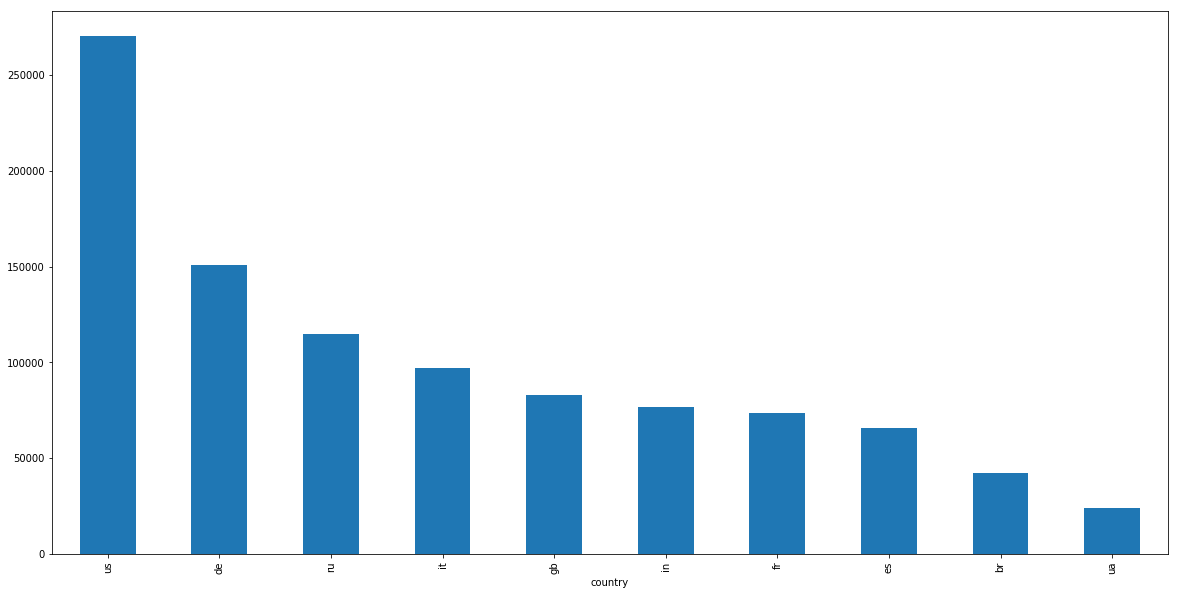

In [22]:
df=p_data_sub.groupby('country').size().sort_values(ascending = False).head(10)
plt.subplots(1,1,figsize=(20,10))
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)     # fontsize of the x and y labels
df.plot.bar()

<i> Keep only 1000000 data samples. Use random state=612. </i>

In [23]:
p_data_s = p_data_sub.sample(n=1000000,random_state=612) # sampling 1million records
p_data_s.shape

(1000000, 6)

In [24]:
p_data_s.sample(5)

country  source   author  \
137483      tr  Bimeks  gamze m   
63786       fr  Amazon   lkzid2   
71180       us  Amazon    Stacy   
309930      us  Amazon  Vern H.   
131513      in  Amazon   ganesh   

                                                  product  score  year  
137483                              Nokia Lumia 625 Black   10.0  2014  
63786   LG G2 Smartphone dÃ©bloquÃ© 4G 5,2 pouces 16 G...   10.0  2015  
71180        BLU Dash JR K Smartphone - Unlocked - Yellow    2.0  2014  
309930  Samsung Galaxy Note Edge, Frosted White 32GB (...   10.0  2014  
131513         Micromax YU YU Yureka Plus,(Moondust Grey)    6.0  2015

##### 2. Answer the following questions

<i>Identify the most rated features. </i>

In [25]:
# assuming, the question is to identify the product with more number of ratings.
p_data_s.groupby('product').size().sort_values(ascending=False).head(10)

product
Huawei P8lite zwart / 16 GB              2043
Samsung Galaxy S6 zwart / 32 GB          1854
OnePlus 3 (Graphite, 64 GB)              1572
Nokia N95                                1526
Lenovo Vibe K4 Note (White,16GB)         1458
Samsung Galaxy J3 (8GB)                  1394
Nokia 5800 XpressMusic                   1354
Lenovo Vibe K4 Note (Black, 16GB)        1299
OnePlus 3 (Soft Gold, 64 GB)             1295
Samsung Galaxy S7 edge 32GB (Verizon)    1278
dtype: int64

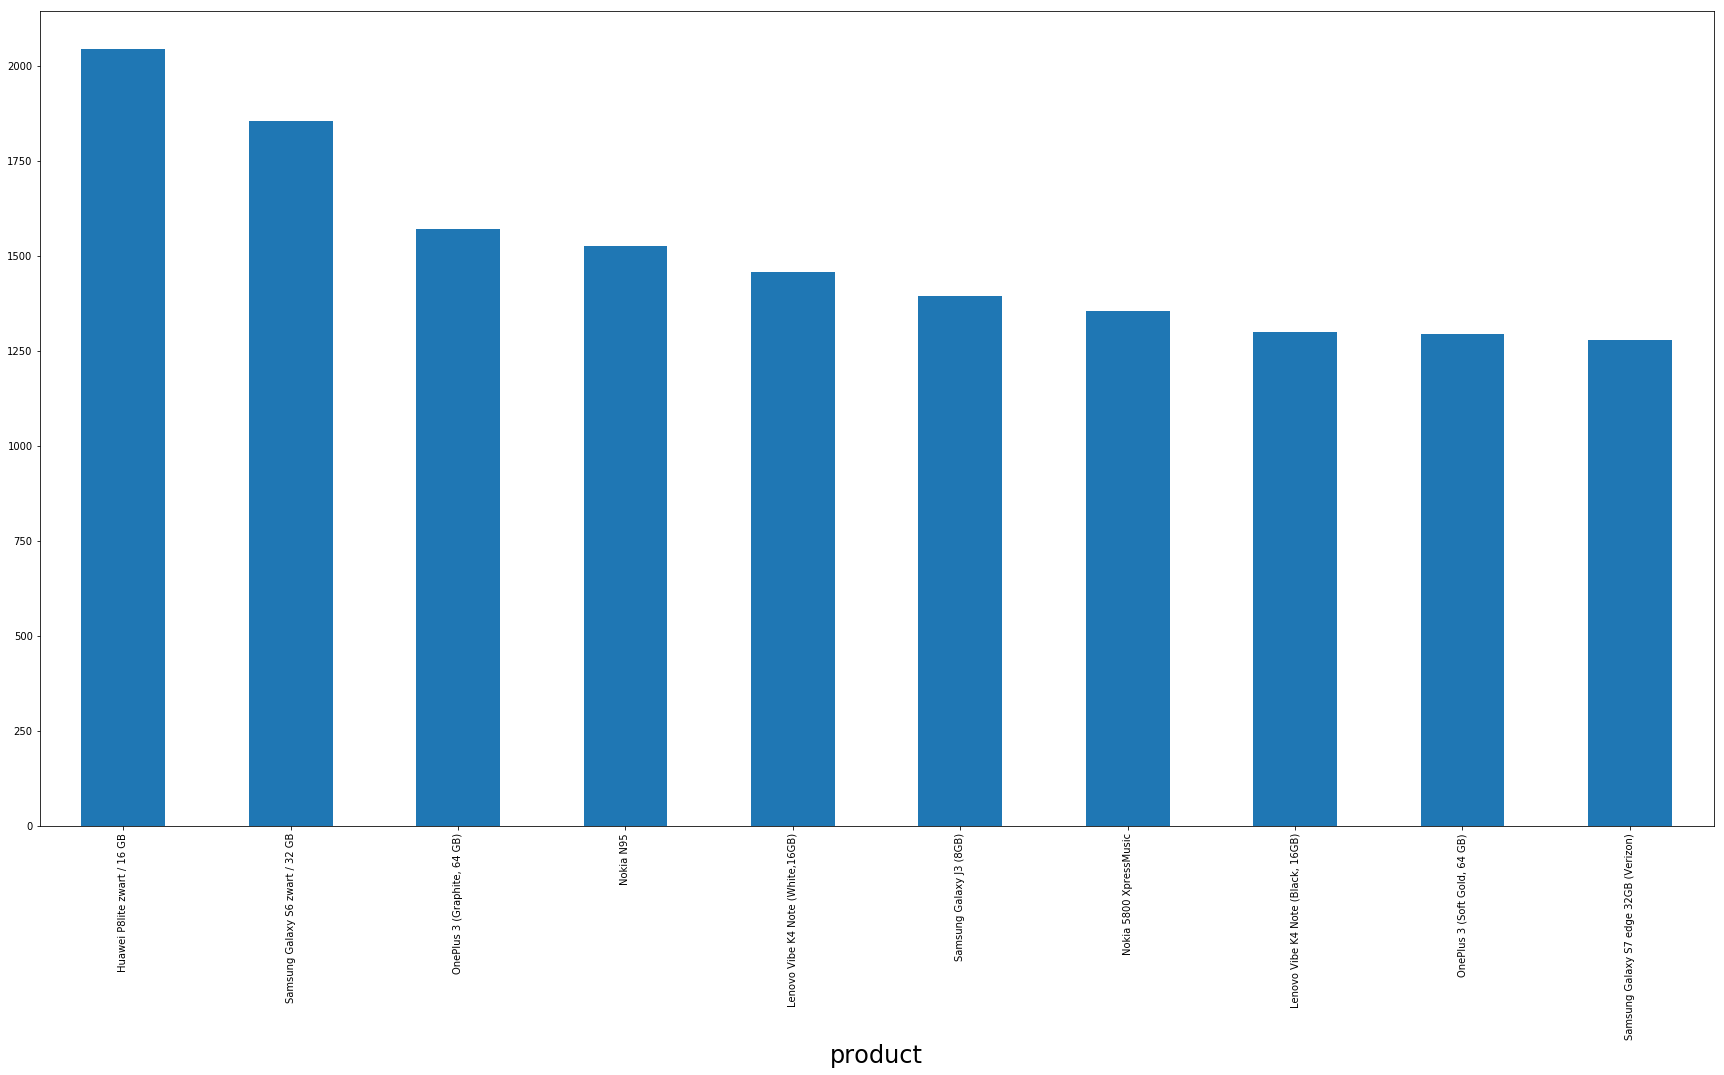

In [26]:
df=p_data_s.groupby('product').size().sort_values(ascending=False).head(10)
plt.subplots(1,1,figsize=(30,15))
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)     # fontsize of the x and y labels
df.plot.bar()

##### Samsung Galaxy, Nokia, OnePlus,Lenova and Huawei are products that have most number of ratings

In [27]:
# get both number of ratings and average rating by product and display top 10
pd_score_average = p_data_s[['product','score']].groupby('product').mean().reset_index() # get average review
pd_score_average.head(5)

product      score
0  'Sony Xperia X (F5122) â€“ White â€“ Dual Sim ...  10.000000
1  'Sony Xperia X (F5122) â€“ rosa â€“ Dual Sim (...  10.000000
2  (7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...   6.000000
3  (CUBOT) GT88 5.5" qHD 1.3GHz MTK6572 2-Core An...   8.000000
4  (DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...   7.428571

In [28]:
pd_reviews=p_data_s[['product','score']].groupby('product').size().reset_index() # get number of reviews
pd_reviews.head(5)   

product   0
0  'Sony Xperia X (F5122) â€“ White â€“ Dual Sim ...   1
1  'Sony Xperia X (F5122) â€“ rosa â€“ Dual Sim (...   1
2  (7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...   1
3  (CUBOT) GT88 5.5" qHD 1.3GHz MTK6572 2-Core An...   1
4  (DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...  35

In [29]:
p_data_score = pd_reviews.merge(pd_score_average) #  merge both datasets on product
p_data_score.head(5)

product   0      score
0  'Sony Xperia X (F5122) â€“ White â€“ Dual Sim ...   1  10.000000
1  'Sony Xperia X (F5122) â€“ rosa â€“ Dual Sim (...   1  10.000000
2  (7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...   1   6.000000
3  (CUBOT) GT88 5.5" qHD 1.3GHz MTK6572 2-Core An...   1   8.000000
4  (DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...  35   7.428571

In [30]:
p_data_score.shape,pd_reviews.shape,pd_score_average.shape

((54476, 3), (54476, 2), (54476, 2))

In [31]:
# show products with atleast 30 reviews
p_data_score.rename(columns={0:'count'},inplace=True)
p_data_score.head(5)

product  count      score
0  'Sony Xperia X (F5122) â€“ White â€“ Dual Sim ...      1  10.000000
1  'Sony Xperia X (F5122) â€“ rosa â€“ Dual Sim (...      1  10.000000
2  (7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...      1   6.000000
3  (CUBOT) GT88 5.5" qHD 1.3GHz MTK6572 2-Core An...      1   8.000000
4  (DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...     35   7.428571

In [32]:
#  products with top rating with atleast 30 user reviews
p_data_score[p_data_score['count']>30].sort_values(by='score',ascending=False).head(10)

product  count      score
25369  Motorola Smartphone Motorola Novo Moto G DTV C...    115  10.000000
43459  Samsung Smartphone Dual Chip Samsung Galaxy SI...    117  10.000000
38100                               Samsung Galaxy Note5    110  10.000000
43460  Samsung Smartphone Dual Chip Samsung Galaxy SI...    127  10.000000
43474  Samsung Smartphone Galaxy Win Duos Branco Desb...    133  10.000000
3078                  Apple iPhone 4S Branco 8GB - Apple     99  10.000000
25361  Motorola Smartphone Motorola Moto G Dual Chip ...    144  10.000000
30731  Nokia Smartphone Nokia Lumia 520 Desbloqueado ...    152  10.000000
25366  Motorola Smartphone Motorola Moto X Desbloquea...    146  10.000000
44715  Sim Free Apple iPhone 6s 64GB Mobile Phone - Gold     43   9.953488

##### Many Samsung and Motorola products appear with high scores and with atleast 30 user reviews

<i>Identify the users with most number of reviews.</i>

In [33]:
# filter out usernames such as 'unknown', 'amazon customer' etc. and print the top users by country
list_user = ['unknown','Amazon Customer','Cliente Amazon',"Client d'Amazon",'Amazon Kunde','Anonymous','Kindle Customer','Amazon-Kunde','anonym','Anonymous ']
p_data_s[~(p_data_s['author'].isin(list_user))].groupby(['country','source','author']).size().sort_values(ascending=False).head(10)

country  source    author    
br       Bondfaro  e-bit         582
it       Amazon    Andrea        423
                   Marco         411
cz       Alza      ZÃ¡kaznÃ­k    389
it       Amazon    Alessandro    378
                   Francesco     367
                   Luca          311
                   Stefano       284
                   Giuseppe      280
                   Davide        244
dtype: int64

##### Amazon Users from Italy have given more number of reviews

<i> Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset </i>

In [34]:
p_data_fil = p_data_s[~(p_data_s['author'].isin(list_user))] # filter out users such as 'unknown', 'Anonymous' etc.
count_p = pd.value_counts(p_data_fil['product'])  # gets the count of ratings for each product
p_data_fil['country|source|author'] = p_data_fil['country']+"-"+ p_data_fil['source']+"-"+p_data_fil['author'] # create new column for easy filtering
p_data_fil.head(5)

country      source                author  \
308172      gb      Amazon      Benjamin Haskell   
62832       gb      Dooyoo        mummyreviewer1   
16017       nl  KIESKEURIG               eddysan   
87582       us      Amazon  Jordan Blake Pinches   
38016       ca     Samsung             The E Man   

                                                  product  score  year  \
308172  Orange LG KS360 Orange Pay As You Go Including...    8.0  2009   
62832                                Blackberry Bold 9900    6.0  2013   
16017            Samsung Galaxy S7 edge 32 GB - Overzicht   10.0  2016   
87582                   Apple iPhone 4 8GB (White) - AT&T    2.0  2010   
38016                        Samsung Galaxy Nexus | Black    8.0  2013   

                 country|source|author  
308172      gb-Amazon-Benjamin Haskell  
62832         gb-Dooyoo-mummyreviewer1  
16017            nl-KIESKEURIG-eddysan  
87582   us-Amazon-Jordan Blake Pinches  
38016             ca-Samsung-The E Man

In [35]:
count_a = pd.value_counts(p_data_fil['country|source|author'])  # gets the count of ratings for each user

# filter if count of products or count of user greater than 50
p_data_filup = p_data_fil[(p_data_fil['product'].isin(count_p[count_p > 50].index)) | (p_data_fil['country|source|author'].isin(count_a[count_a > 50].index))]
p_data_filup.head()

country         source                      author  \
87582       us         Amazon        Jordan Blake Pinches   
38016       ca        Samsung                   The E Man   
114899      ru         Yandex  ÐÐ°Ñ‚ÑƒÑÑŒÐºÐ° Priceless   
71344       us         Amazon                      Joselo   
294173      us  HandCellPhone                       james   

                                                  product  score  year  \
87582                   Apple iPhone 4 8GB (White) - AT&T    2.0  2010   
38016                        Samsung Galaxy Nexus | Black    8.0  2013   
114899                                         HTC Desire    2.0  2011   
71344   BlackBerry Torch 9860 Unlocked Phone with 4GB ...   10.0  2012   
294173                                 Sony Ericsson C905   10.0  2008   

                       country|source|author  
87582         us-Amazon-Jordan Blake Pinches  
38016                   ca-Samsung-The E Man  
114899  ru-Yandex-ÐÐ°Ñ‚ÑƒÑÑŒÐºÐ° Priceless  
71344                       us-Amazon-Joselo  
294173                us-HandCellPhone-james

In [36]:
p_data_filup.shape

(490260, 7)

In [37]:
p_data_filup.drop_duplicates(inplace=True)
p_data_filup.shape

(490260, 7)

##### 3. Build a popularity based model and recommend top 5 mobile phones.

In [38]:
# Since we merged with user ratings, there could be products with rating counts less than 50
# Also, best is to recommend recent models by sorting on year.

count_p = pd.value_counts(p_data_filup['product'])  # gets the count of ratings for each product
p_data_temp = p_data_filup[(p_data_filup['product'].isin(count_p[count_p > 50].index))] 
p_data_temp.groupby(['product'])['score'].mean().sort_values(ascending=False).head(10).reset_index()

product      score
0                               Samsung Galaxy Note5  10.000000
1  Motorola Smartphone Motorola Novo Moto G DTV C...  10.000000
2  Samsung Smartphone Galaxy Win Duos Branco Desb...  10.000000
3  Samsung Smartphone Dual Chip Samsung Galaxy SI...  10.000000
4  Samsung Smartphone Dual Chip Samsung Galaxy SI...  10.000000
5  Nokia Smartphone Nokia Lumia 520 Desbloqueado ...  10.000000
6                 Apple iPhone 4S Branco 8GB - Apple  10.000000
7  Motorola Smartphone Motorola Moto G Dual Chip ...  10.000000
8  Motorola Smartphone Motorola Moto X Desbloquea...  10.000000
9  Ð¡Ð¾Ñ‚Ð¾Ð²Ñ‹Ð¹ Ñ‚ÐµÐ»ÐµÑ„Ð¾Ð½ ASUS ZenFone 2 D...   9.929825

##### Samsung and Motorola products seem to be more popular

In [39]:
p_data_temp[p_data_temp['year'].isin(['2017','2016'])].groupby(['product'])['score'].mean().sort_values(ascending=False).head(10).reset_index()

product  score
0                     Samsung Galaxy Ace II GT-I8160   10.0
1                         Sony Ericsson W995 Walkman   10.0
2                                         Nokia 1616   10.0
3                                     HTC One X 32GB   10.0
4                                         Nokia 1202   10.0
5                                   HTC Sensation XL   10.0
6                                         Nokia 1100   10.0
7  Honor 3C Smartphone, Dual SIM, Display 5 Polli...   10.0
8  Motorola Nexus 6 Unlocked Cellphone, 32GB, Clo...   10.0
9  Motorola Moto G 4G - Smartphone libre (pantall...   10.0

##### Some of these models are older mobiles with recent reviews. 'Year' of review is not really giving us recent models

<b> 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.</b>

In [40]:
p_data_sel = p_data_filup[['country|source|author','product','score']] # use just 3 columns from the filtered dataset
p_data_sel['product'].nunique()

11197

In [41]:
count_p = pd.value_counts(p_data_sel['product'])
p_data_sel = p_data_sel[(p_data_sel['product'].isin(count_p[count_p > 50].index))] 
p_data_sel['product'].nunique()

3946

In [42]:
p_data_sel = p_data_sel.sample(n=30000,random_state=612) # sampling 10000 records to avoid memory issues
p_data_sel.shape

(30000, 3)

In [43]:
reader = surprise.Reader(rating_scale=(1, 10))
data_surprise = surprise.Dataset.load_from_df(p_data_sel, reader) # convert pandas dataframe into surprise data

In [44]:
trainset, testset = train_test_split(data_surprise, test_size=.3, random_state = 612) # split data into train and test sets

In [45]:
# declare all the models
# SVD for matrix factorization
svd = SVD() 

# Use user_based to true for user-based collaborative filtering
usb = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

# Use user_based to false for item-based collaborative filtering
itb = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [46]:
def fit_n_pred(model, trainset, testset):  
    """
        Purpose: Trains the model that is passed in the input, and tests it with test dataset
        returns: accuracy.rmse
    """

    model.fit(trainset)             # fit the model using the train data

    prediction = model.test(testset)  # model predictions on the test data
        
    return suracc.rmse(prediction, verbose=True), prediction  # suracc is surprise.accuracy

def print_results(result):
    """
        Purpose: This function takes input a dictionary and prints the metrics as a dataframe
        returns: dataframe with metrics
    """
    # create dataframe for easy reading of results

    #get values from dictionary
    results_frame = np.array(list(result.values()))

    # round values to single decimal digit
    results_frame = np.round_(results_frame,decimals = 2)

    columns = ['RMSE']

    # create dataframe
    result1 = pd.DataFrame(results_frame,columns= columns, index= result.keys())

    return result1

In [47]:
# Call fit_n_pred for each of the models
result = {}
predictions=list()
models = [svd,usb,itb]
names = ['matrix', 'u2u', 'i2i']
for model, name in zip(models,names):
    acc, prediction = fit_n_pred(model, trainset, testset)  
    result[name] = acc
    predictions.append(prediction)

RMSE: 2.4669
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.5801
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.5463


##### 5. Evaluate the collaborative model. Print RMSE value

In [48]:
# print final accuracy results for each of the models
result1=print_results(result)
result1

RMSE
matrix  2.47
u2u     2.58
i2i     2.55

##### 6. Predict score (average rating) for test users.

In [49]:
def get_top_n(predictions, n=5):
    """
        Purpose: This function takes input prediction output. It sorts the items based on ratings for each user
        returns: dictionary of the sorted top 5 items 
    """
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def getList(dict):
    """
        Purpose: To get keys of a dictionary
        returns: Retuns keys of a dictionary as a list
    """
    return list(dict.keys())

In [53]:
top_n = get_top_n(predictions[0], n=5)  # get top 5 predictions for every user
user_list = getList(top_n) # get list of users 
user = randrange(len(user_list)) # generate a random number, to get the predictions for that particular user

print("User:",user_list[user],"Top predictions:",top_n[user_list[user]])

User: de-Amazon-pastella Top predictions: [('HTC Desire Z Smartphone (9.4 cm (3.7 Zoll) Touchscreen, 5MP Kamera, Android 2.2 OS, QWERTZ-Tastatur, HSPA, ohne Branding ) Tungsten Grey', 8.247563913685692)]


##### 7. Report your findings and inferences.

a. Samsung Galaxy, Nokia, OnePlus,Lenova and Huawei are products that have most number of ratings in the given dataset
<br>
b. Samsung and Motorola products seem to be more popular and have received top ratings.
<br>
c. In this dataset, SVD matrix factorization has performed slightly better in terms of accuracy on the testset, followed by id to id collaborative filtering and then user to user collaborative filtering

##### 8. Try and recommend top 5 products for test users

In [54]:
p_data_sel.groupby(['country|source|author']).size().sort_values(ascending=False).head(10)

country|source|author
it-Amazon-Alessandro                16
it-Amazon-Marco                     15
it-Amazon-Luca                      13
ru-Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹-Ð”Ð¼Ð¸Ñ‚Ñ€Ð¸Ð¹    13
it-Amazon-Francesco                 12
br-Bondfaro-e-bit                   12
it-Amazon-Paolo                     12
it-Amazon-Giuseppe                  11
it-Amazon-Andrea                    11
it-Amazon-Davide                    11
dtype: int64

In [55]:
print("Top predictions:",top_n["it-Amazon-Marco"]) # Look top predictions for user with more reviews (likely to have more records in test set)

Top predictions: [('Huawei Ascend G620s Smartphone, 8 GB, Nero', 9.232855294194977), ('Samsung I9060i Galaxy Grand Neo Plus Smartphone, 8 GB, Bianco [Italia]', 8.94373937273624), ('Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (Bianco)', 8.713436568540095), ('Blackview BV5000 IP67 impermeabile Smartphone 4G FDD-LTE 3G WCDMA Shockproof antipolvere Rugged Outdoor Drfy Android 5.1 OS Quad Core MTK6735P 5.0 "IPS 1.0GHz schermo 64bit', 8.556803367660834), ('Samsung Galaxy Ace Smartphone, Nero', 8.512595142667276)]


In [56]:
top_n = get_top_n(predictions[1], n=5)  # get top 5 predictions for every user by u2u method
print("Top predictions:",top_n["it-Amazon-Marco"]) # Look top predictions for user with more reviews (likely to have more records in test set)

Top predictions: [('Blackview BV5000 IP67 impermeabile Smartphone 4G FDD-LTE 3G WCDMA Shockproof antipolvere Rugged Outdoor Drfy Android 5.1 OS Quad Core MTK6735P 5.0 "IPS 1.0GHz schermo 64bit', 9.6), ('Huawei Ascend G620s Smartphone, 8 GB, Nero', 9.6), ('Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (Bianco)', 9.6), ('Samsung Galaxy Ace Smartphone, Nero', 9.6), ('Samsung I9060i Galaxy Grand Neo Plus Smartphone, 8 GB, Bianco [Italia]', 9.6)]


In [57]:
top_n = get_top_n(predictions[2], n=5)  # get top 5 predictions for every user by i2i method
print("Top predictions:",top_n["it-Amazon-Marco"]) # Look top predictions for user with more reviews (likely to have more records in test set)

Top predictions: [('Samsung I9060i Galaxy Grand Neo Plus Smartphone, 8 GB, Bianco [Italia]', 10), ('Huawei Ascend G620s Smartphone, 8 GB, Nero', 9.0), ('Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (Bianco)', 9.0), ('Samsung Galaxy Ace Smartphone, Nero', 7.0), ('Blackview BV5000 IP67 impermeabile Smartphone 4G FDD-LTE 3G WCDMA Shockproof antipolvere Rugged Outdoor Drfy Android 5.1 OS Quad Core MTK6735P 5.0 "IPS 1.0GHz schermo 64bit', 6.666666666666667)]


##### Similar models are recommended by the 3 procedures although the order is different

##### 9. Try cross validation techniques to get better results.

In [50]:
p_data_sel.shape

(30000, 3)

In [51]:
p_data_sel = p_data_sel.sample(n=10000,random_state=612) # sampling 10000 records to avoid memory issues

In [52]:
p_data_sel.shape

(10000, 3)

In [53]:
data_cv = surprise.Dataset.load_from_df(p_data_sel, reader) # convert pandas dataframe into surprise data

In [198]:
# train_cv, test_cv = train_test_split(data_cv, test_size=.3, random_state = 612) # split data into train and test sets

In [54]:
lr_all = [0.001, 0.003, 0.005]
n_factors = [70,80,90,100]
n_epochs = [20,30,40]

param_grid_svd = dict(lr_all=lr_all,n_factors=n_factors,n_epochs=n_epochs)


# SVD for matrix factorization

gs = GridSearchCV(SVD,param_grid_svd, measures=['rmse'], cv=3, n_jobs = -1) # gridsearch to find best params
gs.fit(data_cv) # fit on the train set

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.4840771218119198
{'lr_all': 0.005, 'n_factors': 90, 'n_epochs': 30}


In [55]:
sv = SVD(lr_all=0.005,n_factors=90,n_epochs=40) # declare cross validation parameters
sv.fit(trainset)
prediction = sv.test(testset)  # model predictions on the test data
print(suracc.rmse(prediction, verbose=True)) # suracc is surprise.accuracy

RMSE: 2.4709
2.4709421067739967


##### Gridsearch KNNWithMeans

In [61]:
param_grid_u2u = {'k': [20, 30, 40, 50],
                  'sim_options': {'name': ['pearson_baseline', 'cosine'],'user_based': [True]}
                  }

gs = GridSearchCV(KNNWithMeans,param_grid_u2u, measures=['rmse'], cv=3, n_jobs = -1) # gridsearch to find best params
gs.fit(data_cv) # fit on the train set

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.5506973724324418
{'k': 20, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [62]:
# Use user_based to true for user-based collaborative filtering
usb = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': True}) # declare cross validation parameters
usb.fit(trainset)
prediction = usb.test(testset)  # model predictions on the test data
print(suracc.rmse(prediction, verbose=True)) # suracc is surprise.accuracy

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.5804
2.58043403384481


In [63]:
param_grid_i2i = {'k': [20, 30, 40, 50],
                  'sim_options': {'name': ['pearson_baseline', 'cosine'],'user_based': [False]}
                  }

gs = GridSearchCV(KNNWithMeans,param_grid_i2i, measures=['rmse'], cv=3, n_jobs = -1) # gridsearch to find best params
gs.fit(data_cv) # fit on the train set

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.536411426453798
{'k': 20, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [64]:
# Use user_based to False for item-based collaborative filtering
i2i = KNNWithMeans(k=20, sim_options={'name': 'cosine', 'user_based': False}) # declare cross validation parameters
i2i.fit(trainset)
prediction = i2i.test(testset)  # model predictions on the test data
print(suracc.rmse(prediction, verbose=True)) # suracc is surprise.accuracy

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.5473
2.547320031738488


##### 10. In what business scenario you should use popularity based Recommendation Systems ?

1. Popularity based recommendations are not user specific. It can be used when no profile or usage information about the user is available. In such scenarios described as "cold start", popularity based recommendation system can be used
2. They can also be used to recommend to users about popular products,items, videos based on their geography etc. Ex: Top 10 movies trending on Netflix for India etc.
3. Apps such as Netflix use both user based as well as popularity based recommendations for users

##### 11. In what business scenario you should use CF based Recommendation Systems ?

Collaborative Filtering techniques can be used when we have generic profile information and usage information about the user.
This allows us to get enough information about the user's behaviour and hence can be used to predict his likelihood to consume other items.

However, it can't be used when  we have no information about the user(cold start problem) or we have very less information (Grey sheep problem) about the user

##### 12. What other possible methods can you think of which can further improve the recommendation for different users ?

1. Order history - Recent buys can help to predict what kind of products a user is more likely to buy
2. Search history/ Wishlist - These can provide information about products that interest the users
3. Hybrid system - which uses popularity, content , collaborative filtering and other user informations to provide recommendations